# **Guarding Cyberspace: Detecting and Preventing Phishing Emails**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks

/content/drive/MyDrive/Colab_Notebooks


## **DATA CLEANING AND DATA ANALYSIS AND MODELING**

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Load the data sets**

In [ ]:
data_nazario = pd.read_csv("Nazario_5.csv")

In [ ]:
data_nazario.head()

,sender,receiver,date,subject,body,label,urls
0,"""Hu, Sylvia"" <Sylvia.Hu@ENRON.com>","""Acevedo, Felecia"" <Felecia.Acevedo@ENRON.com>...","Fri, 29 Jun 2001 08:36:09 -0500","FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr\nPW: bnaweb22\n\n\n ...,0,"['http://web.bna.com', 'http://pubs.bna.com/ip..."
1,"""Webb, Jay"" <Jay.Webb@ENRON.com>","""Lambie, Chris"" <Chris.Lambie@ENRON.com>","Fri, 29 Jun 2001 09:37:04 -0500",NGX failover plan.,"\nHi Chris, \n\nTonight we are rolling out a ...",0,[]
2,"""Symms, Mark"" <Mark.Symms@ENRON.com>","""Thomas, Paul D."" <Paul.D.Thomas@ENRON.com>","Fri, 29 Jun 2001 08:39:30 -0500",RE: Intranet Site,Rika r these new?\n\n -----Original Message---...,0,['http://eastpower.dev.corp.enron.com/summary/...
3,"""Thorne, Judy"" <Judy.Thorne@ENRON.com>","""Grass, John"" <John.Grass@ENRON.com>, ""Nemec, ...","Fri, 29 Jun 2001 10:35:17 -0500",FW: ENA Upstream Company information,"John/Gerald,\n\nWe are currently trading under...",0,[]
4,"""Williams, Jason R (Credit)"" <Jason.R.Williams...","""Nemec, Gerald"" <Gerald.Nemec@ENRON.com>, ""Dic...","Fri, 29 Jun 2001 10:40:02 -0500",New Master Physical,Gerald and Stacy -\n\nAttached is a worksheet ...,0,[]


In [ ]:
data_nazario.tail()

,sender,receiver,date,subject,body,label,urls
3060,info advantageapartments.com <info@advantageap...,"""jose@monkey.org"" <jose@monkey.org>","Sun, 11 Dec 2022 12:04:50 +0000",Receipt for Your Payment to FTX.,PayPal You sent a payment of $699.99 USD to FT...,1,0
3061,monkey.org <HELPDESK@monkey.org>,jose@monkey.org,15 Dec 2022 18:33:00 -0500,Rectify Your Password With monkey.org,"monkey.org Hi jose,Pa⁠s⁠sword for⁠ jose@monke...",1,1
3062,Help Center\n\t<info.help-center.co.za_info.he...,jose@monkey.org,"Tue, 20 Dec 2022 23:00:27 +0000 (UTC)",Netflix : We're having some trouble with your ...,"HELLO, Please note that, your monthly paymen...",1,1
3063,MetaMask <info@sofamekar.com>,jose@monkey.org,27 Dec 2022 10:56:49 +0800,Your MetaMask wallet will be suspended,Verify your MetaMask Wallet Our system has sho...,1,1
3064,Fastway\n\t<info.fastway.co.za_info.fastway.co...,jose@monkey.org,"Wed, 21 Dec 2022 01:33:32 +0000 (UTC)",Your shipment is on the way,Announcing JotForm Tables: When a spreadsheet ...,1,1


### **Data Exploration**

1. Display the data how it looks.
2. Information about the data, column data types.
3. Describe some statistical information about our dataset.

In [ ]:
# Display the first few rows of the dataset
print(data_nazario.head())

# Get an overview of the data types of each column and summary statistics
print(data_nazario.info())
print(data_nazario.describe())

                                              sender  \
0                 "Hu, Sylvia" <Sylvia.Hu@ENRON.com>   
1                   "Webb, Jay" <Jay.Webb@ENRON.com>   
2               "Symms, Mark" <Mark.Symms@ENRON.com>   
3             "Thorne, Judy" <Judy.Thorne@ENRON.com>   
4  "Williams, Jason R (Credit)" <Jason.R.Williams...   

                                            receiver  \
0  "Acevedo, Felecia" <Felecia.Acevedo@ENRON.com>...   
1           "Lambie, Chris" <Chris.Lambie@ENRON.com>   
2        "Thomas, Paul D." <Paul.D.Thomas@ENRON.com>   
3  "Grass, John" <John.Grass@ENRON.com>, "Nemec, ...   
4  "Nemec, Gerald" <Gerald.Nemec@ENRON.com>, "Dic...   

                              date  \
0  Fri, 29 Jun 2001 08:36:09 -0500   
1  Fri, 29 Jun 2001 09:37:04 -0500   
2  Fri, 29 Jun 2001 08:39:30 -0500   
3  Fri, 29 Jun 2001 10:35:17 -0500   
4  Fri, 29 Jun 2001 10:40:02 -0500   

                                       subject  \
0  FW: June 29 -- BNA, Inc. Daily Labor Report 

### **Observations**

1. These are the columns sender,receiver,date,subject, body, label and urls.
2. Only label column is numerical data rest all are text data.
3. There are 3065 unique records consisting of phishing and legitimate emails.

## **Data Preprocessing checks**

1. How many missing values check?
2. Duplicates check.

In [ ]:
# Check for blank values in each column
blank_values = data_nazario.isna().sum()

print("Blank values in each column:")
print(blank_values)


Blank values in each column:
sender        2
receiver    113
date          3
subject      50
body          0
label         0
urls          0
dtype: int64


In [ ]:
data_nazario.shape[0]

3065

In [ ]:
# Check for duplicate rows
duplicate_rows = data_nazario.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [ ]:
data_nazario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    3063 non-null   object
 1   receiver  2952 non-null   object
 2   date      3062 non-null   object
 3   subject   3015 non-null   object
 4   body      3065 non-null   object
 5   label     3065 non-null   int64 
 6   urls      3065 non-null   object
dtypes: int64(1), object(6)
memory usage: 167.7+ KB


### Handle Missing values
- Fill all sender email with '' if it is blank

In [ ]:
def replace_blank_emptystring(data):
    check_nulls = data_nazario[data].isnull()
    data_nazario[data].fillna('', inplace=True)
    print(f'Total missing values replaced in column {data} : {check_nulls.sum()}')

In [ ]:
column_names = ['sender','receiver','date','subject','body']

# Replace the null values in the column with ''
for col in column_names:
    replace_blank_emptystring(col)

Total missing values replaced in column sender : 2
Total missing values replaced in column receiver : 113
Total missing values replaced in column date : 3
Total missing values replaced in column subject : 50
Total missing values replaced in column body : 0


### Data Preparation/ Data Cleaning
- Raw data must be cleaned before training the model.

Following steps are applied so that the data is in cleaned format
1. Lower all cases of text so that our model is not case sensitive.
2. Remove stop words for each text using NLTK.
3. Word lemmitization.


In [ ]:
### Step 3 : Word Lemmitization
def word_lemmatization_data(text_data):
    """
    """

    lemmatized_data = WordNetLemmatizer()
    words = nltk.word_tokenize(text_data)

    # Lemmatize each word and join them back into a string
    lemmatized_words_data = [lemmatized_data.lemmatize(word) for word in words]
    lemmatized_text_final = ' '.join(lemmatized_words_data)

    return lemmatized_text_final


In [ ]:
def data_cleaning(data):
    """
    """
    # Step 1 : Lower all cases of text so that our model is not case sensitive.
    data_nazario[data] = data_nazario[data].str.lower()
    print("-------Step 1 : Lower all cases of text so that our model is not case sensitive----")
    print(f'Successfully lowered all cases of {data} data')
    print()

    # Step 2 : Remove stop words
    print("-------Step 2 : Remove stop words for each text using NLTK----")
    before_stop = sum(data_nazario[data].apply(lambda x: len(x.split())))
    print(f"Total number of words for column {data}: {before_stop}")


    stop_words = set(stopwords.words('english'))
    count_total = Counter()
    data_nazario[data] = data_nazario[data].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words and count_total.update([word.lower()]) is None]))

    # Count total no of stop words removed
    total_count = sum(count_total.values())
    print(f"Total stopwords removed for column {data}: {total_count}")
    print()

    # Step 3 : Remove numbers and puntuation marks
    # Call the function remove_punctuations_data




    # Step 5 : Word lemmatization
    # Call the function word_lemmatization_data
    data_nazario[data] = data_nazario[data].apply(word_lemmatization_data)
    print("-------Step 3 : Word lemmatization----")
    print(f"Word lemmatization completed for column {data}")
    print()


    ## show chart
    # storing the values in a list that we want to display graph
    steps = ['Stopwords']
    before_data = [before_stop]
    after_data = [total_count]

    # Plot bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    index = range(len(steps))
    ax.bar(index, before_data, bar_width, label='Before', color='blue')
    ax.bar([i + bar_width for i in index], after_data, bar_width, label='After', color='orange')

    ax.set_xlabel(f'Data cleaning operation for column {data}')
    ax.set_ylabel('Count')
    ax.set_title(f'Data Cleaning Steps: Before and After for column {data}')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(steps)
    ax.legend()

    # Add counts above each bar
    for i, v in enumerate(before_data):
        ax.text(i, v + 10, str(v), ha='center')
    for i, v in enumerate(after_data):
        ax.text(i + bar_width, v + 10, str(v), ha='center')

    plt.tight_layout()
    plt.show()




-------Step 1 : Lower all cases of text so that our model is not case sensitive----
Successfully lowered all cases of subject data

-------Step 2 : Remove stop words for each text using NLTK----
Total number of words for column subject: 16246
Total stopwords removed for column subject: 13400

-------Step 3 : Word lemmatization----
Word lemmatization completed for column subject



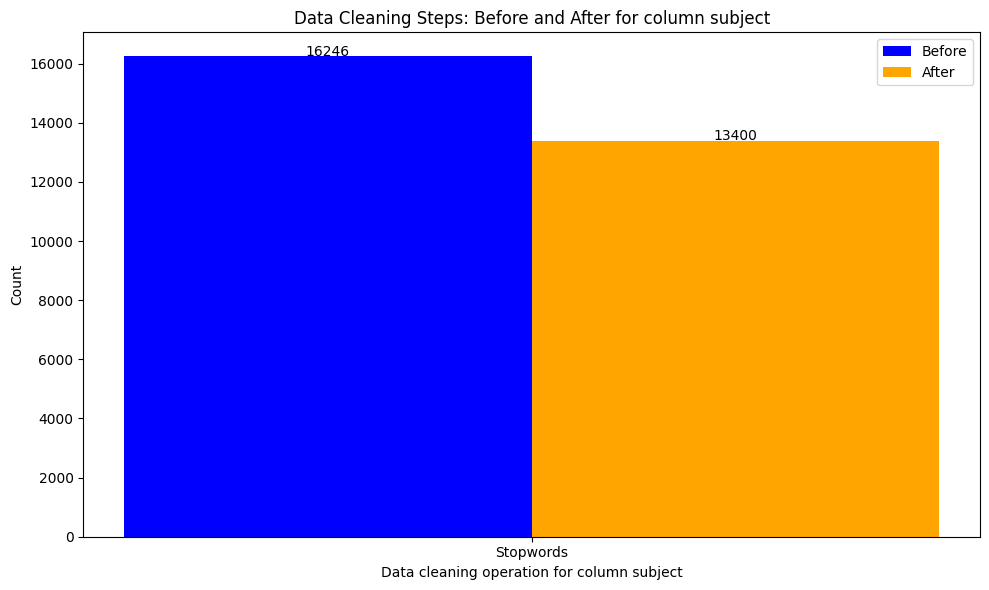

-------Step 1 : Lower all cases of text so that our model is not case sensitive----
Successfully lowered all cases of body data

-------Step 2 : Remove stop words for each text using NLTK----
Total number of words for column body: 901902
Total stopwords removed for column body: 648299

-------Step 3 : Word lemmatization----
Word lemmatization completed for column body



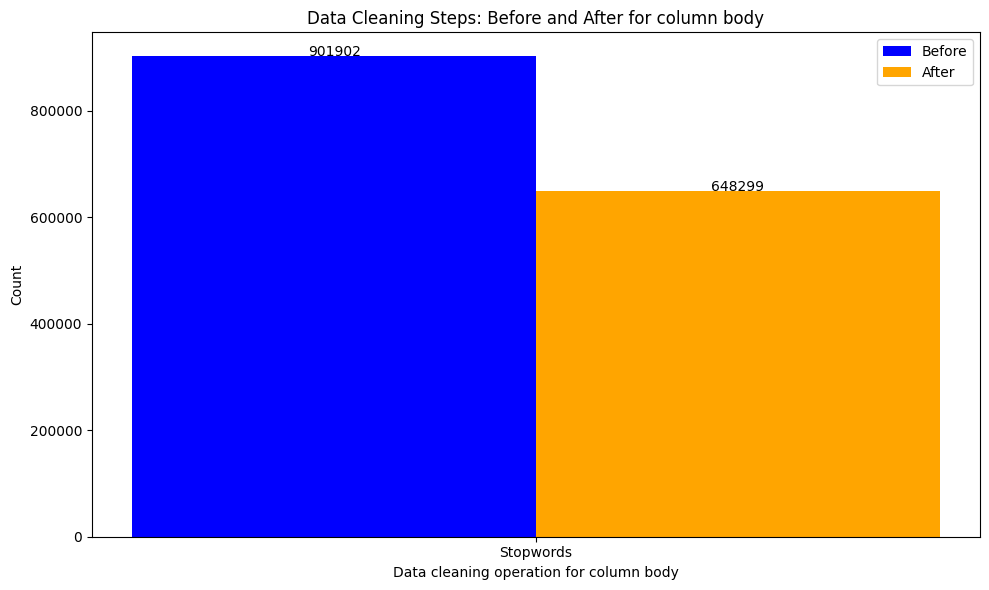

In [ ]:
column_names = ['subject','body']

# Replace the null values in the column with ''
for col in column_names:
    data_cleaning(col)

In [ ]:
# Format proper email id in the form abc@gmail.com
data_nazario['sender'] = data_nazario['sender'].str.extract(r'(?<=<)(.*?)(?=>)')

# **Exploratory Data Analysis**

- Analyzing text data is challenging. We have plotted various graphs to analyze the data and get insights from the data.
- Based on EDA, we derived the **35 columns** for building machine learning model.

## **EDA - 1**

count    3065.000000
mean        0.510604
std         0.499969
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64


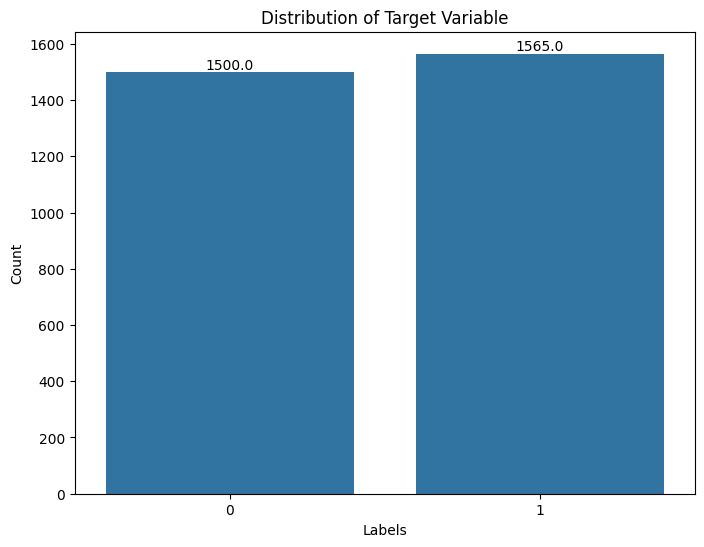

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print description of the 'label' column
print(data_nazario['label'].describe())

# Plot countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=data_nazario)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


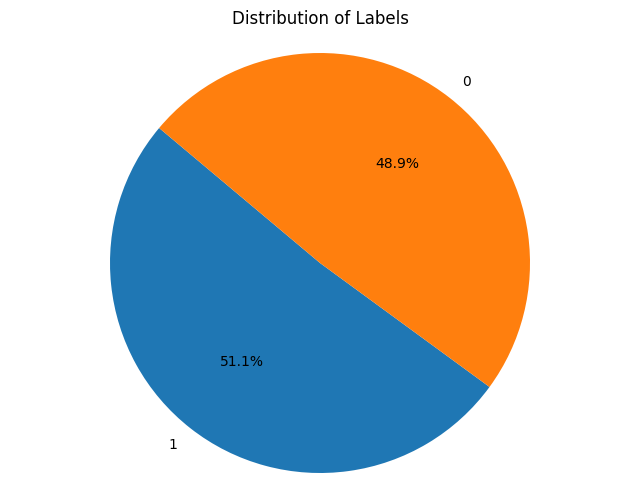

In [ ]:

label_counts = data_nazario['label'].value_counts()
total_count = len(data_nazario)
percentages = (label_counts / total_count) * 100

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()


## **EDA - 2**

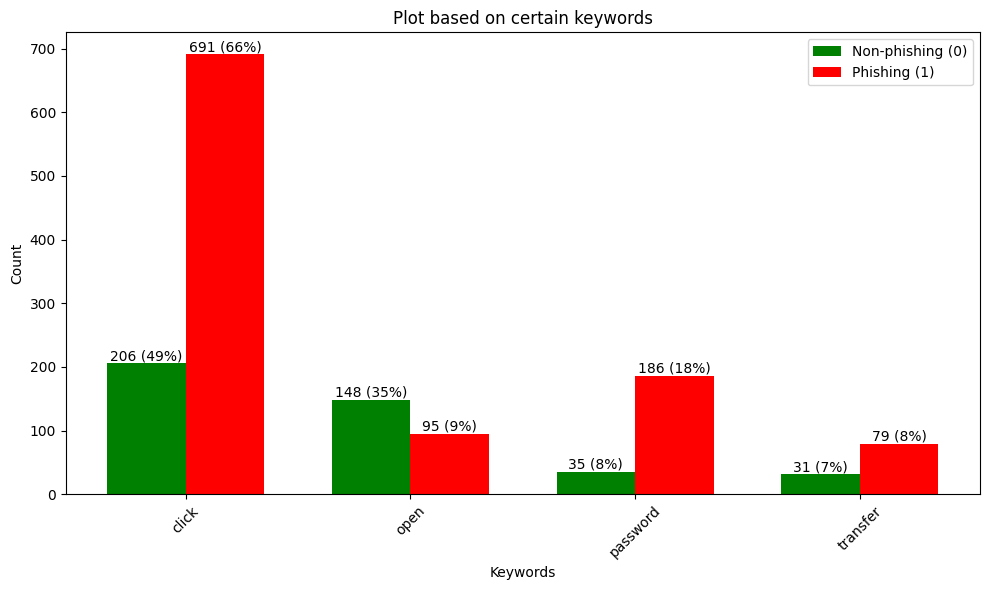

In [ ]:
# Define the search keywords
keywords = ['click', 'open', 'password', 'transfer']

# Function to check if a keyword is present in the body
def check_keyword(body, keyword):
    return keyword in body

# Search for keywords in the body column
for keyword in keywords:
    data_nazario[keyword] = data_nazario['body'].apply(lambda x: check_keyword(x, keyword))

# colour mapping 1 indicates phishing and 0 indicates non-phishing
label_colors = {1: 'red', 0: 'green'}

# store values of 0 and 1
keyword_counts_0 = []
keyword_counts_1 = []

# Calculate counts for each keyword and label
for keyword in keywords:
    keyword_counts = data_nazario.groupby('label')[keyword].sum()
    keyword_counts_0.append(keyword_counts[0])
    keyword_counts_1.append(keyword_counts[1])

# Bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(keywords))

bars_0 = plt.bar(index, keyword_counts_0, bar_width, label='Non-phishing', color='green')
bars_1 = plt.bar([i + bar_width for i in index], keyword_counts_1, bar_width, label='Phishing', color='red')

plt.xlabel('Keywords')
plt.ylabel('Count')
plt.title('Plot based on certain keywords')
plt.xticks([i + bar_width / 2 for i in index], keywords, rotation=45)

# Add counts
for bars in [bars_0, bars_1]:
    for bar in bars:
        height = bar.get_height()
        total_height = sum([bar.get_height() for bar in bars])
        percentage = (height / total_height) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{int(height)} ({percentage:.0f}%)', ha='center', va='bottom')

#Legends
plt.legend(['Non-phishing (0)', 'Phishing (1)'])

plt.tight_layout()
plt.show()


## **EDA-3**

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


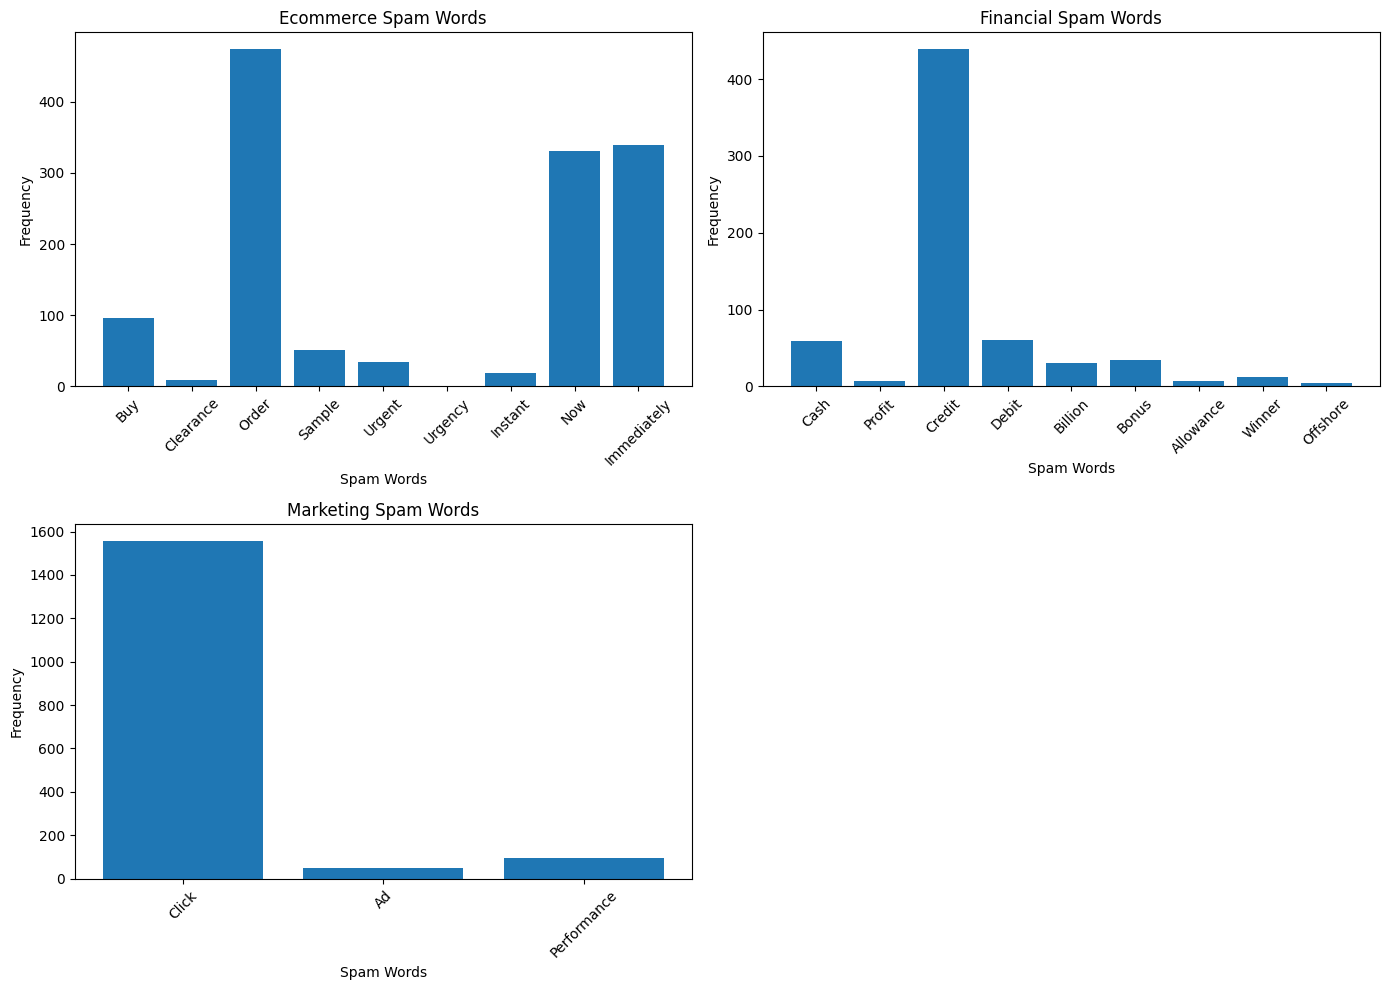

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

# Download WordNet from NLTK
nltk.download('wordnet')

# Reference for this words is : https://moosend.com/blog/spam-words/
spam_words = {
    'ecommerce': ['Buy', 'Buy direct', 'Buy today', 'Clearance', 'As seen on', 'Order', 'Order status', 'Sample', 'Wants credit card', 'Claim now', 'Act now', 'This won’t last', 'Expires soon', 'Limited time', 'Exclusive deal', 'Urgent', '100%', '50% off', 'All-new', 'Best price', 'All-natural', '100% satisfaction', 'Lifetime', 'Urgency', 'Do it today!', 'Act now!', 'Act fast!', 'Apply now', 'Apply online', 'Access fast', 'Call now', 'Call free', 'Instant access', 'Don’t hesitate', 'For you', 'Instant', 'Now', 'Now only', 'Order expires', 'Please read', 'Take action now', 'While supplies last', 'One time only', 'Click this link', 'Click to remove', 'Final call', 'Hurry up', 'Immediately', 'This won’t last', 'Top urgent', 'Last chance', 'Claim your prize', 'New customers only', 'Important information regarding'],
    'financial': ['Money Back', 'Dollars', 'Cash', 'Profit', '$$$', 'Big bucks', 'Fast cash', 'Extra cash', 'Get paid', 'Credit', 'Debit', 'Billion', 'Cash Bonus', 'Best price', 'Bonus', 'Double your income', 'Free Investment', 'Lowest interest rate', 'No strings attached', 'Risk-free', 'Serious cash', 'Save money', 'Best rates', 'Unsecured credit', 'Pure profit', 'Best mortgage rates', 'Extra income', 'Credit card offers', 'No hidden fees', 'No hidden charges', 'No hidden costs', 'US dollars', 'Allowance', 'Action required', 'Why pay more?', 'You are a winner', 'You are selected', 'Very cheap', 'Avoid bankruptcy', 'Financial independence', 'Online biz opportunity', 'Risk-free', 'Pre-approved', 'Winner', 'Offshore'],
    'legal': ['Loans', 'Luxury', 'Accept credit cards', 'Beneficiary', 'Claims', 'Claims to be legal'],
    'ethical_behavior': ['Dear friend', 'Direct email', 'Bulk email', 'Mass email', 'Confidentiality', 'Cancel any time', 'Congratulations', 'No catch', 'No costs', 'No gimmicks', 'Human growth hormone', 'Not spam', 'No obligation'],
    'marketing': ['Click', 'Click below', 'Click here to remove', 'Ad', 'Auto email removal', 'Email marketing', 'Email harvest', 'Direct marketing', 'Internet marketing', 'Internet market', 'Increase sales', 'Increase traffic', 'Marketing solutions', 'Mass email', 'Bulk email', 'Direct email', 'More internet traffic', 'Notspam', 'Performance', 'We hate spam', 'Will not believe your eyes', 'Undisclosed recipient'],
    'miscellaneous': ['Babes', 'Cutie', 'Kinky', 'Mature', 'Viagra', 'Valium', 'Vicodin', 'Weight loss', 'Xanax', 'Lose weight fast', 'Stop aging', 'Cure baldness', 'Miracle', 'This is not a scam', 'This is not fraud', 'Not junk', 'No questions asked', 'Internet marketing', 'Multi-level marketing', 'Direct marketing', 'Click below to access', 'Meet singles', 'Social security number', 'Search engine', 'Internet traffic', 'Password', 'Requires initial investment', 'Your income', 'Get out of debt']
}

# convert to lower case
all_spam_words = [word.lower() for words in spam_words.values() for word in words]

# Normalization of text
def tokenize_normalize(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Remove punctuation and non-alphanumeric characters
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if token.isalnum()]
    return tokens


similar_words_counter = Counter()

# Iterate over each row in the DataFrame
for index, row in data_nazario.iterrows():
    body = row['body']  # Get the email body from the current row
    tokens = tokenize_normalize(body)  # Tokenize, lemmatize, and normalize the text

    # Count the occurrence of similar words
    for token in tokens:
        for spam_category, spam_words_list in spam_words.items():
            for spam_word in spam_words_list:
                if token == spam_word.lower():  # Exact match
                    similar_words_counter[spam_word] += 1
                    break


catogories = ['ecommerce', 'financial', 'marketing']

# bar graph
plt.figure(figsize=(14, 10))
for i, category in enumerate(catogories, 1):
    # Extract words and frequencies for the current category
    category_words = [word for word in spam_words[category] if word in similar_words_counter]
    category_frequencies = [similar_words_counter[word] for word in category_words]

    # Plot bar chart
    plt.subplot(2, 2, i)
    plt.bar(category_words, category_frequencies)
    plt.title(f'{category.capitalize()} Spam Words')
    plt.xlabel('Spam Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()



## **EDA-4**

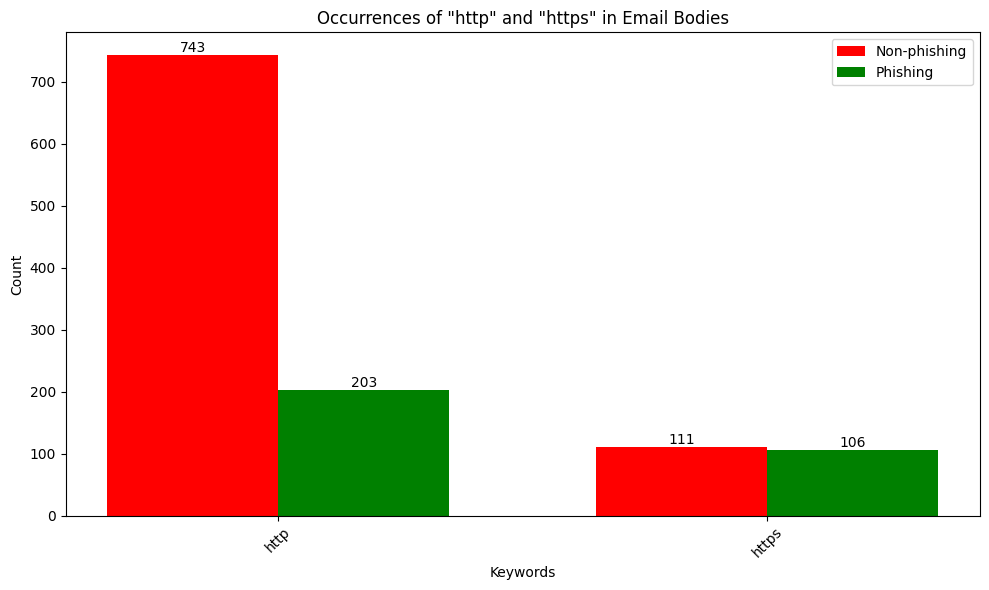

In [ ]:
# store in one more dataframe
data = pd.read_csv('Nazario_5.csv')

# search keywords
keywords = ['http', 'https']

# search for these keywords
def check_keyword(body, keyword):
    return keyword in body.lower()

# Search for keywords in the body column
for keyword in keywords:
    data[keyword] = data['body'].apply(lambda x: check_keyword(str(x), keyword))

# Initialize lists to store counts for each keyword
keyword_counts_0 = []
keyword_counts_1 = []

# Calculate counts for each keyword and label
for keyword in keywords:
    keyword_counts = data.groupby('label')[keyword].sum()
    keyword_counts_0.append(keyword_counts[0])
    keyword_counts_1.append(keyword_counts[1])

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(keywords))

bars_0 = plt.bar(index, keyword_counts_0, bar_width, label='Non-phishing', color='red')
bars_1 = plt.bar([i + bar_width for i in index], keyword_counts_1, bar_width, label='Phishing', color='green')

plt.xlabel('Keywords')
plt.ylabel('Count')
plt.title('Occurrences of "http" and "https" in Email Bodies')
plt.xticks([i + bar_width / 2 for i in index], keywords, rotation=45)

# Add annotations on top of the bars with count values
for bars in [bars_0, bars_1]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{int(bar.get_height())}', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()


## **EDA-5**

In [ ]:
import re

# Function to extract URLs from text and return them as a list of strings
def extract_urls(text):
    urls = re.findall(r"(https?://\S+)", text)
    return ["'" + url + "'" for url in urls]

# Apply the function to the 'body' column and store the result in a new column
data['urls_list'] = data['body'].apply(extract_urls)



In [ ]:
## Create 2 more columns
import re

# Define the function to extract region names from a list of URLs
def get_region_names(urls):
    # Define the mapping of ccTLDs to region names
    ccTLD_to_region = {
    ".ac": "Ascension Island",
    ".ad": "Andorra",
    ".ae": "United Arab Emirates",
    ".af": "Afghanistan",
    ".ag": "Antigua and Barbuda",
    ".ai": "Anguilla",
    ".al": "Albania",
    ".am": "Armenia",
    ".an": "Netherlands Antilles",
    ".ao": "Angola",
    ".aq": "Antarctica",
    ".ar": "Argentina",
    ".as": "American Samoa",
    ".at": "Austria",
    ".au": "Australia",
    ".aw": "Aruba",
    ".ax": "Åland Islands",
    ".az": "Azerbaijan",
    ".ba": "Bosnia and Herzegovina",
    ".bb": "Barbados",
    ".bd": "Bangladesh",
    ".be": "Belgium",
    ".bf": "Burkina Faso",
    ".bg": "Bulgaria",
    ".bh": "Bahrain",
    ".bi": "Burundi",
    ".bj": "Benin",
    ".bm": "Bermuda",
    ".bn": "Brunei Darussalam",
    ".bo": "Bolivia",
    ".br": "Brazil",
    ".bs": "Bahamas",
    ".bt": "Bhutan",
    ".bv": "Bouvet Island",
    ".bw": "Botswana",
    ".by": "Belarus",
    ".bz": "Belize",
    ".ca": "Canada",
    ".cc": "Cocos Islands",
    ".cd": "Democratic Republic of the Congo",
    ".cf": "Central African Republic",
    ".cg": "Republic of the Congo",
    ".ch": "Switzerland",
    ".ci": "Côte d'Ivoire",
    ".ck": "Cook Islands",
    ".cl": "Chile",
    ".cm": "Cameroon",
    ".cn": "China",
    ".co": "Colombia",
    ".cr": "Costa Rica",
    ".cu": "Cuba",
    ".cv": "Cape Verde",
    ".cw": "Curaçao",
    ".cx": "Christmas Island",
    ".cy": "Cyprus",
    ".cz": "Czech Republic",
    ".de": "Germany",
    ".dj": "Djibouti",
    ".dk": "Denmark",
    ".dm": "Dominica",
    ".do": "Dominican Republic",
    ".dz": "Algeria",
    ".ec": "Ecuador",
    ".ee": "Estonia",
    ".eg": "Egypt",
    ".er": "Eritrea",
    ".es": "Spain",
    ".et": "Ethiopia",
    ".eu": "European Union",
    ".fi": "Finland",
    ".fj": "Fiji",
    ".fk": "Falkland Islands",
    ".fm": "Federated States of Micronesia",
    ".fo": "Faroe Islands",
    ".fr": "France",
    ".ga": "Gabon",
    ".gb": "United Kingdom",
    ".gd": "Grenada",
    ".ge": "Georgia",
    ".gf": "French Guiana",
    ".gg": "Guernsey",
    ".gh": "Ghana",
    ".gi": "Gibraltar",
    ".gl": "Greenland",
    ".gm": "Gambia",
    ".gn": "Guinea",
    ".gp": "Guadeloupe",
    ".gq": "Equatorial Guinea",
    ".gr": "Greece",
    ".gs": "South Georgia and the South Sandwich Islands",
    ".gt": "Guatemala",
    ".gu": "Guam",
    ".gw": "Guinea-Bissau",
    ".gy": "Guyana",
    ".hk": "Hong Kong",
    ".hm": "Heard Island and McDonald Islands",
    ".hn": "Honduras",
    ".hr": "Croatia",
    ".ht": "Haiti",
    ".hu": "Hungary",
    ".id": "Indonesia",
    ".ie": "Ireland",
    ".il": "Israel",
    ".im": "Isle of Man",
    ".in": "India",
    ".io": "British Indian Ocean Territory",
    ".iq": "Iraq",
    ".ir": "Iran",
    ".is": "Iceland",
    ".it": "Italy",
    ".je": "Jersey",
    ".jm": "Jamaica",
    ".jo": "Jordan",
    ".jp": "Japan",
    ".ke": "Kenya",
    ".kg": "Kyrgyzstan",
    ".kh": "Cambodia",
    ".ki": "Kiribati",
    ".km": "Comoros",
    ".kn": "Saint Kitts and Nevis",
    ".kp": "Democratic People's Republic of Korea (North Korea)",
    ".kr": "Republic of Korea (South Korea)",
    ".kw": "Kuwait",
    ".ky": "Cayman Islands",
    ".kz": "Kazakhstan",
    ".la": "Laos",
    ".lb": "Lebanon",
    ".lc": "Saint Lucia",
    ".li": "Liechtenstein",
    ".lk": "Sri Lanka",
    ".lr": "Liberia",
    ".ls": "Lesotho",
    ".lt": "Lithuania",
    ".lu": "Luxembourg",
    ".lv": "Latvia",
    ".ly": "Libya",
    ".ma": "Morocco",
    ".mc": "Monaco",
    ".md": "Moldova",
    ".me": "Montenegro",
    ".mf": "Saint Martin (French part)",
    ".mg": "Madagascar",
    ".mh": "Marshall Islands",
    ".mk": "North Macedonia",
    ".ml": "Mali",
    ".mm": "Myanmar",
    ".mn": "Mongolia",
    ".mo": "Macao",
    ".mp": "Northern Mariana Islands",
    ".mq": "Martinique",
    ".mr": "Mauritania",
    ".ms": "Montserrat",
    ".mt": "Malta",
    ".mu": "Mauritius",
    ".mv": "Maldives",
    ".mw": "Malawi",
    ".mx": "Mexico",
    ".my": "Malaysia",
    ".mz": "Mozambique",
    ".na": "Namibia",
    ".nc": "New Caledonia",
    ".ne": "Niger",
    ".nf": "Norfolk Island",
    ".ng": "Nigeria",
    ".ni": "Nicaragua",
    ".nl": "Netherlands",
    ".no": "Norway",
    ".np": "Nepal",
    ".nr": "Nauru",
    ".nu": "Niue",
    ".nz": "New Zealand",
    ".om": "Oman",
    ".pa": "Panama",
    ".pe": "Peru",
    ".pf": "French Polynesia",
    ".pg": "Papua New Guinea",
    ".ph": "Philippines",
    ".pk": "Pakistan",
    ".pl": "Poland",
    ".pm": "Saint Pierre and Miquelon",
    ".pn": "Pitcairn",
    ".pr": "Puerto Rico",
    ".ps": "Palestinian Territory",
    ".pt": "Portugal",
    ".pw": "Palau",
    ".py": "Paraguay",
    ".qa": "Qatar",
    ".re": "Réunion",
    ".ro": "Romania",
    ".rs": "Serbia",
    ".ru": "Russia",
    ".rw": "Rwanda",
    ".sa": "Saudi Arabia",
    ".sb": "Solomon Islands",
    ".sc": "Seychelles",
    ".sd": "Sudan",
    ".se": "Sweden",
    ".sg": "Singapore",
    ".sh": "Saint Helena",
    ".si": "Slovenia",
    ".sj": "Svalbard and Jan Mayen",
    ".sk": "Slovakia",
    ".sl": "Sierra Leone",
    ".sm": "San Marino",
    ".sn": "Senegal",
    ".so": "Somalia",
    ".sr": "Suriname",
    ".ss": "South Sudan",
    ".st": "São Tomé and Príncipe",
    ".sv": "El Salvador",
    ".sx": "Sint Maarten (Dutch part)",
    ".sy": "Syria",
    ".sz": "Eswatini",
    ".tc": "Turks and Caicos Islands",
    ".td": "Chad",
    ".tf": "French Southern Territories",
    ".tg": "Togo",
    ".th": "Thailand",
    ".tj": "Tajikistan",
    ".tk": "Tokelau",
    ".tl": "Timor-Leste",
    ".tm": "Turkmenistan",
    ".tn": "Tunisia",
    ".to": "Tonga",
    ".tr": "Turkey",
    ".tt": "Trinidad and Tobago",
    ".tv": "Tuvalu",
    ".tw": "Taiwan",
    ".tz": "Tanzania",
    ".ua": "Ukraine",
    ".ug": "Uganda",
    ".uk": "United Kingdom",
    ".us": "United States",
    ".uy": "Uruguay",
    ".uz": "Uzbekistan",
    ".va": "Vatican City",
    ".vc": "Saint Vincent and the Grenadines",
    ".ve": "Venezuela",
    ".vg": "British Virgin Islands",
    ".vi": "U.S. Virgin Islands",
    ".vn": "Vietnam",
    ".vu": "Vanuatu",
    ".wf": "Wallis and Futuna",
    ".ws": "Samoa",
    ".ye": "Yemen",
    ".yt": "Mayotte",
    ".za": "South Africa",
    ".zm": "Zambia",
    ".zw": "Zimbabwe"
    }


# Initialize an empty list to store region names
    region_names = []

    # Iterate over each URL in the list
    for url in urls:
        # Extract the domain part of the URL
        domain_match = re.search(r'https?://(?:www\.)?([^/]+)', url)
        if domain_match:
            domain = domain_match.group(1)
            # Extract the country code (ccTLD) from the domain
            country = "." + domain.split('.')[-1]
            if country:

                region = ccTLD_to_region.get(country.lower(), 'Global')
                region_names.append(region)
            else:
               region_names.append('Global')
        else:
            region_names.append('Global')

    return region_names[:len(data)]

# Example list of URLs
urls_list = [url for sublist in data['urls_list'] for url in sublist]

# Get the region names for the list of URLs
region_names = get_region_names(urls_list)

data['region'] = region_names



In [ ]:
import plotly.graph_objects as go


filtered_data = data[data['label'] == 1]

# Calculate the counts of each region
region_counts = filtered_data['region'].value_counts()

if 'Global' not in region_counts.index:
    region_counts['Global'] = 0

data = pd.DataFrame({'region': region_counts.index, 'count': region_counts.values})

colorscale = 'YlOrRd'

fig = go.Figure(data=go.Choropleth(
    locations=data['region'],
    z=data['count'],
    locationmode='country names',
    colorscale=colorscale,
    autocolorscale=True,
    marker_line_color='white',
    colorbar_title='Count'
))


fig.update_layout(title_text='Distribution of URL Regions for phishing emails')

fig.show()


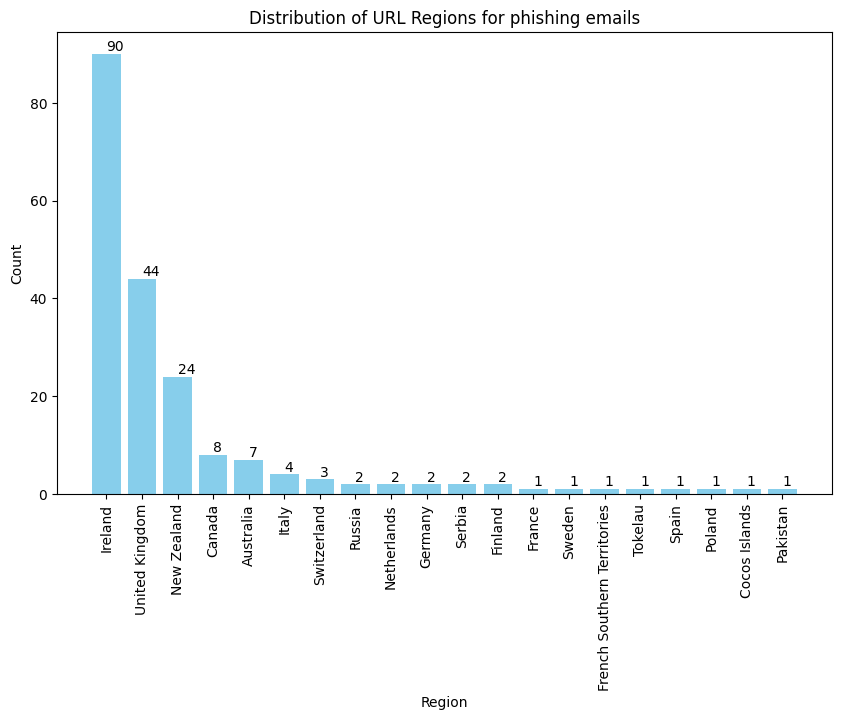

In [ ]:

region_counts = filtered_data['region'].value_counts()

#We dont want global
region_counts = region_counts.drop('Global', errors='ignore')

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the bars
bars = plt.bar(region_counts.index, region_counts.values, color='skyblue')

# Add counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom')

# Add labels and title
plt.xlabel('Region')  # x-axis label
plt.ylabel('Count')   # y-axis label
plt.title('Distribution of URL Regions for phishing emails')  # Title of the plot

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


## **EDA 6**

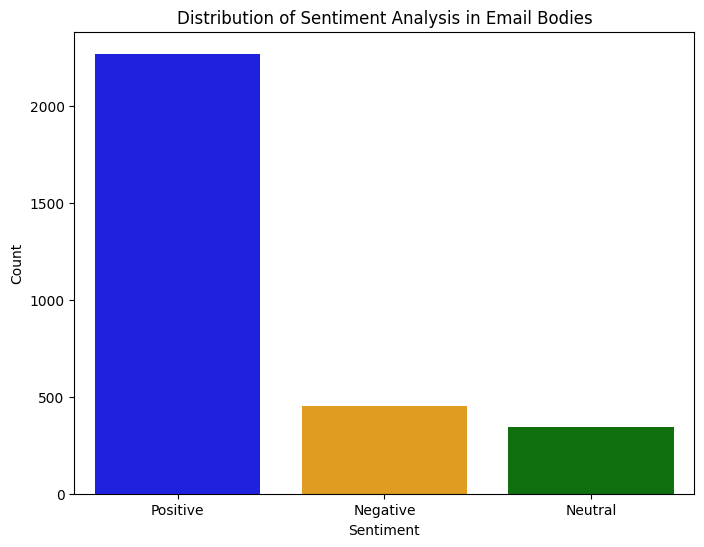

In [ ]:
from textblob import TextBlob

# Define a custom color palette with different colors
palette = ["Blue", "Orange", "Green"]  # Add more colors if needed

# Sentiment Analysis Distribution of Email Bodies
def sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to email bodies
data_nazario['sentiment_body'] = data_nazario['body'].apply(sentiment)

# Display the distribution of sentiment in email bodies
sentiment_analysis_body = data_nazario['sentiment_body'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_analysis_body.index, y=sentiment_analysis_body.values, palette=palette)
plt.title('Distribution of Sentiment Analysis in Email Bodies')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# **EDA 7:**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2


phishing_emails = data_nazario[data_nazario['label'] == 1]['body']

# define TF-IDF and do certain pre-processing
tfidf_vectorizer = TfidfVectorizer(
    lowercase=True,
    tokenizer=nltk.word_tokenize,
    stop_words='english',
    strip_accents='unicode',
    max_features=1000
)

# We have to transform
matrix = tfidf_vectorizer.fit_transform(phishing_emails)

# tokenised words as variables
variable_names = tfidf_vectorizer.get_feature_names_out()

# Convert to pandas df
tfidf_df = pd.DataFrame(matrix.toarray(), columns=variable_names)

# Chi-squared test ()
k = 500  # Number of features to select (adjust as needed)
selector = SelectKBest(chi2, k=k)
tfidf_selected = selector.fit_transform(matrix, data_nazario[data_nazario['label'] == 1]['label'])

# Get the indices of the selected features
index_val = selector.get_support(indices=True)

# Get the selected feature names (words)
selected_features = [variable_names[i] for i in index_val]

# mean scores
score_mean = tfidf_df[selected_features].mean()

# Descending order sort
sorted_tfidf_scores = score_mean.sort_values(ascending=False)

# Display the top malicious words based on TF-IDF scores
mal_words = sorted_tfidf_scores.head(20)  # Change the number as needed
print("Top malicious words based on TF-IDF scores:")
print(mal_words)

Top malicious words based on TF-IDF scores:
monkey.org    0.058583
message       0.041382
update        0.037091
usaa          0.032415
security      0.029919
verify        0.028242
mail          0.027935
service       0.026105
password      0.023866
upgrade       0.023850
request       0.023672
mailbox       0.022793
payment       0.019953
online        0.019866
new           0.018423
server        0.018194
team          0.018176
sent          0.017625
thank         0.017559
u             0.017543
dtype: float64


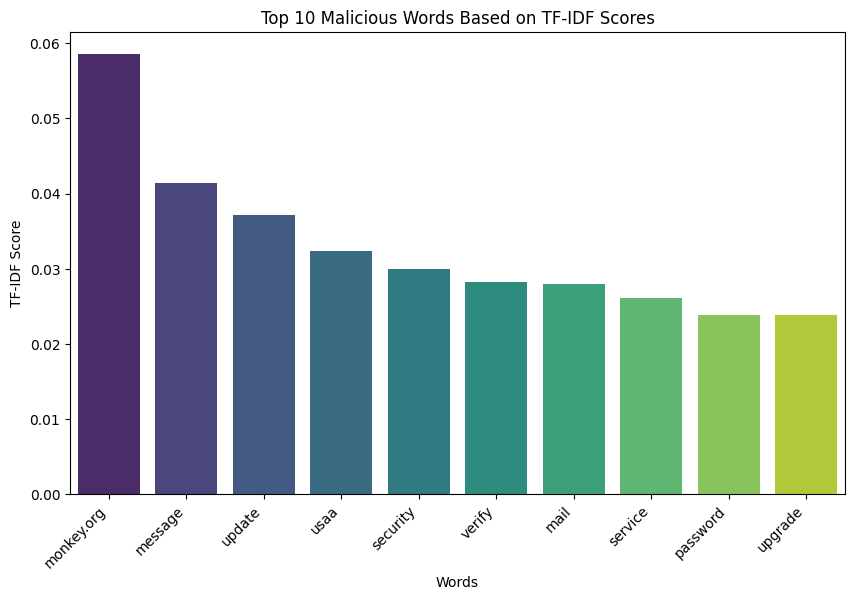

In [ ]:
# Select top 10 malicious words based on TF-IDF scores
top_malicious_words = mal_words.index[:10]

# Plot bar plot of top 10 malicious words
plt.figure(figsize=(10, 6))
sns.barplot(x=top_malicious_words, y=mal_words.values[:10], palette='viridis')
plt.title('Top 10 Malicious Words Based on TF-IDF Scores')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.show()


# **EDA 8:**

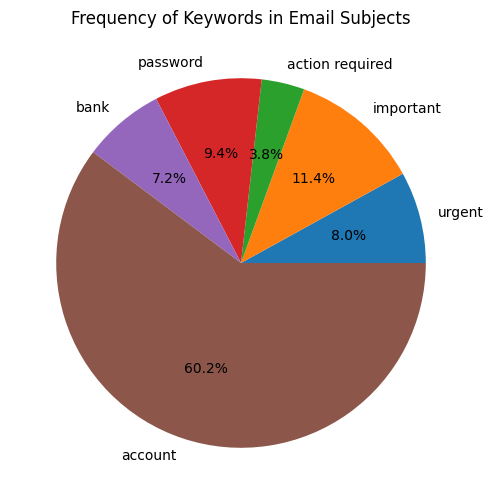

In [ ]:
keywords = ['urgent', 'important', 'action required', 'password', 'bank', 'account']
counts = [data_nazario['subject'].str.contains(keyword, case=False).sum() for keyword in keywords]

plt.figure(figsize=(10, 6))
plt.pie(counts, labels=keywords, autopct='%1.1f%%')
plt.title('Frequency of Keywords in Email Subjects')
plt.show()


# **EDA 9:**

## **Analysing the Sentiments in Email Body**

In [ ]:
from textblob import TextBlob

# Positive, Negative and Neutral sentiments
def sentiment(text):
    analysis = TextBlob(text)
    #Positive, Negative and Neutral sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to email bodies
data_nazario['sentiment'] = data_nazario['body'].apply(sentiment)

# Display the distribution of sentiment
sentiment_analysis = data_nazario['sentiment'].value_counts()
print(sentiment_analysis)


sentiment
Positive    2269
Negative     453
Neutral      343
Name: count, dtype: int64


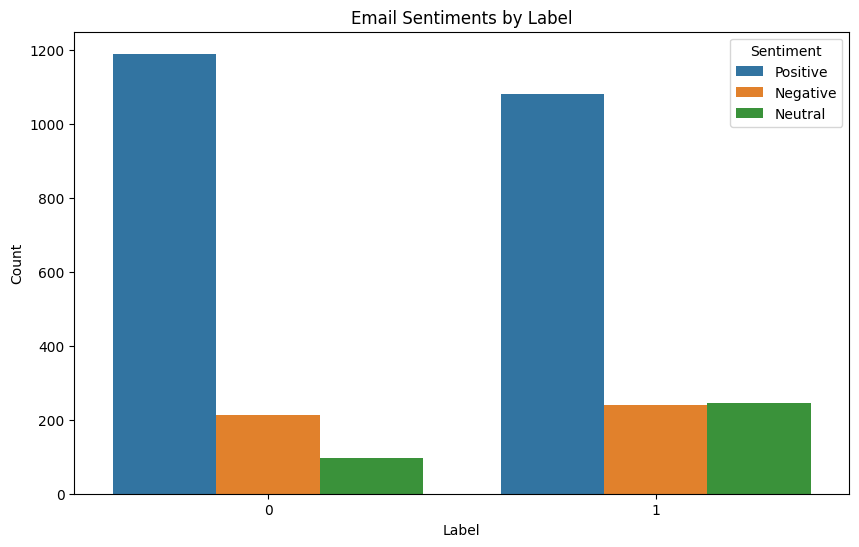

In [ ]:
# Stacked bar plot of email sentiments (positive, negative, neutral) by label
plt.figure(figsize=(10, 6))
sns.countplot(data=data_nazario, x='label', hue='sentiment')
plt.title('Email Sentiments by Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')
plt.show()

# **EDA 10:**

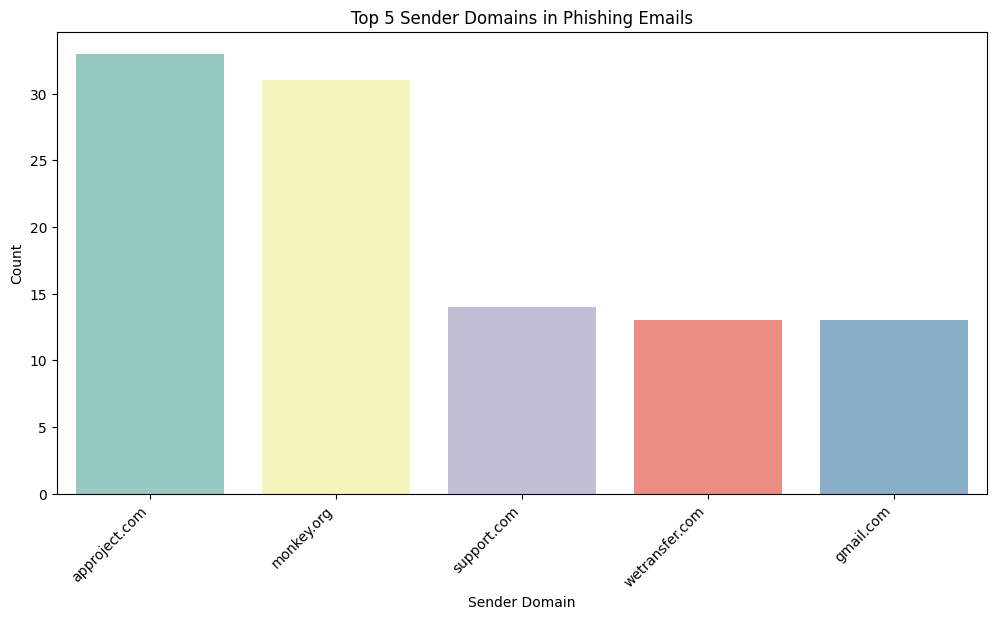

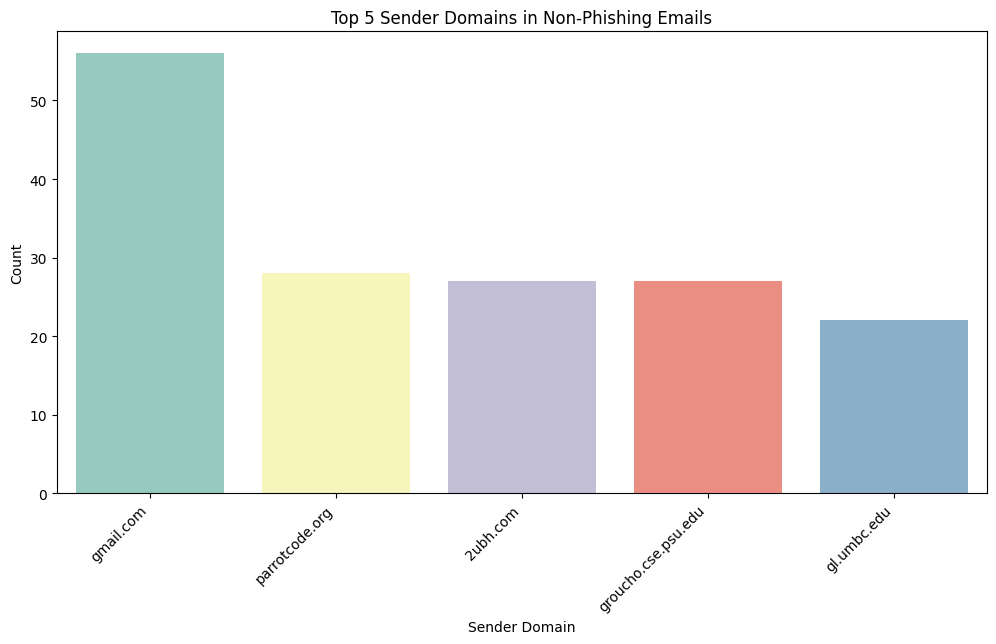

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract sender domain from email addresses
data_nazario['sender_domain'] = data_nazario['sender'].apply(lambda x: str(x).split('@')[-1])


# Filter out rows where sender domain is not NaN
filtered_data = data_nazario[data_nazario['sender_domain'].notna()]

# Filter out phishing emails
phishing_data = filtered_data[filtered_data['label'] == 1]

# Filter out non-phishing emails
non_phishing_data = filtered_data[filtered_data['label'] == 0]

# Plot sender domain distribution for phishing emails
plt.figure(figsize=(12, 6))
sns.countplot(x='sender_domain', data=phishing_data, palette='Set3', order=phishing_data['sender_domain'].value_counts().iloc[1:6].index)
plt.xlabel('Sender Domain')
plt.ylabel('Count')
plt.title('Top 5 Sender Domains in Phishing Emails')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot sender domain distribution for non-phishing emails
plt.figure(figsize=(12, 6))
sns.countplot(x='sender_domain', data=non_phishing_data, palette='Set3', order=non_phishing_data['sender_domain'].value_counts().iloc[2:7].index)
plt.xlabel('Sender Domain')
plt.ylabel('Count')
plt.title('Top 5 Sender Domains in Non-Phishing Emails')
plt.xticks(rotation=45, ha='right')
plt.show()


##**EDA 11** : Content Analysis

In [ ]:
# Content Analysis
# Topic Modeling with LDA (assuming 'body' column contains email bodies)
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data_nazario['body'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Top words for Topic #{i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print('\n')

Top words for Topic #0:
['20', '10', 'received', 'jose', 'id', 'content', 'monkey', '2015', 'org', 'com']


Top words for Topic #1:
['like', 'file', 'use', 'org', 'linux', 'time', 'new', 'www', 'list', 'http']


Top words for Topic #2:
['request', 'dear', 'click', 'mail', 'message', 'jose', 'monkey', 'account', 'org', 'email']


Top words for Topic #3:
['click', 'example', 'service', 'com', 'security', 'email', 'usaa', 'http', 'information', 'account']


Top words for Topic #4:
['note', 'sender', 'added', 'yahoo', 'net', 'aol', 'hotmail', 'id', 'submission', 'com']




##**EDA 12** : Phishing tactics found in ​email bodies​

Common urgency tactics: important          142
immediate           32
action required     19
urgent              18
Name: count, dtype: int64

Common fear tactics: security alert         29
suspicious activity    18
account suspension      8
unauthorized access     1
Name: count, dtype: int64

Common impersonation tactics: verification    162
login           144
phishing         47
authenticate      5
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

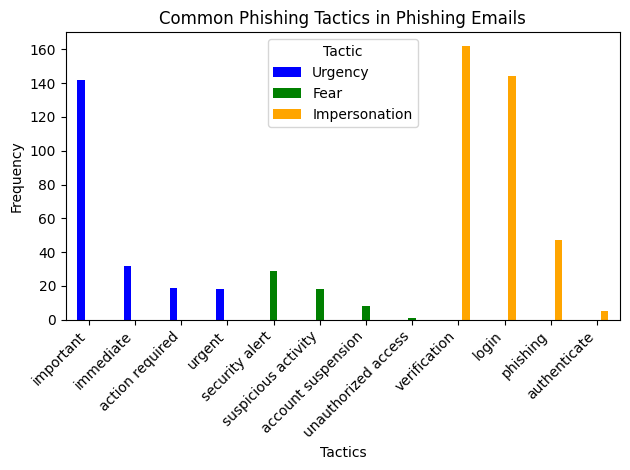

In [ ]:
import nltk
import re

# Define detecting urgency, fear tactics, and impersonation
urgency_keywords = ['urgent', 'important', 'immediate', 'action required']
fear_keywords = ['security alert', 'account suspension', 'unauthorized access', 'suspicious activity']
impersonation_keywords = ['phishing', 'authenticate', 'verification', 'login']

# Function to detect tactics in email body
def detect_tactics(body_text, keywords):
    detected_keywords = []
    for keyword in keywords:
        if re.search(r'\b' + keyword + r'\b', body_text, re.IGNORECASE):
            detected_keywords.append(keyword)
    return detected_keywords

# Apply tactic detection to phishing emails
phishing_emails = data_nazario[data_nazario['label'] == 1]['body'].dropna()

urgency_tactics = []
fear_tactics = []
impersonation_tactics = []

for email in phishing_emails:
    urgency_tactics.extend(detect_tactics(email, urgency_keywords))
    fear_tactics.extend(detect_tactics(email, fear_keywords))
    impersonation_tactics.extend(detect_tactics(email, impersonation_keywords))

# Count the occurrences of each tactic
urgency_counts = pd.Series(urgency_tactics).value_counts()
fear_counts = pd.Series(fear_tactics).value_counts()
impersonation_counts = pd.Series(impersonation_tactics).value_counts()

print("Common urgency tactics:", urgency_counts)
print("\nCommon fear tactics:", fear_counts)
print("\nCommon impersonation tactics:", impersonation_counts)

# Combine tactic counts into a single DataFrame
combined_counts = pd.concat([urgency_counts, fear_counts, impersonation_counts], axis=1)
combined_counts.columns = ['Urgency', 'Fear', 'Impersonation']

# Plot combined tactic counts
plt.figure(figsize=(10, 6))
combined_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Common Phishing Tactics in Phishing Emails')
plt.xlabel('Tactics')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tactic')
plt.tight_layout()
plt.show()

##**EDA 13** : Different types of grammatical errors in phishing email's subject lines

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

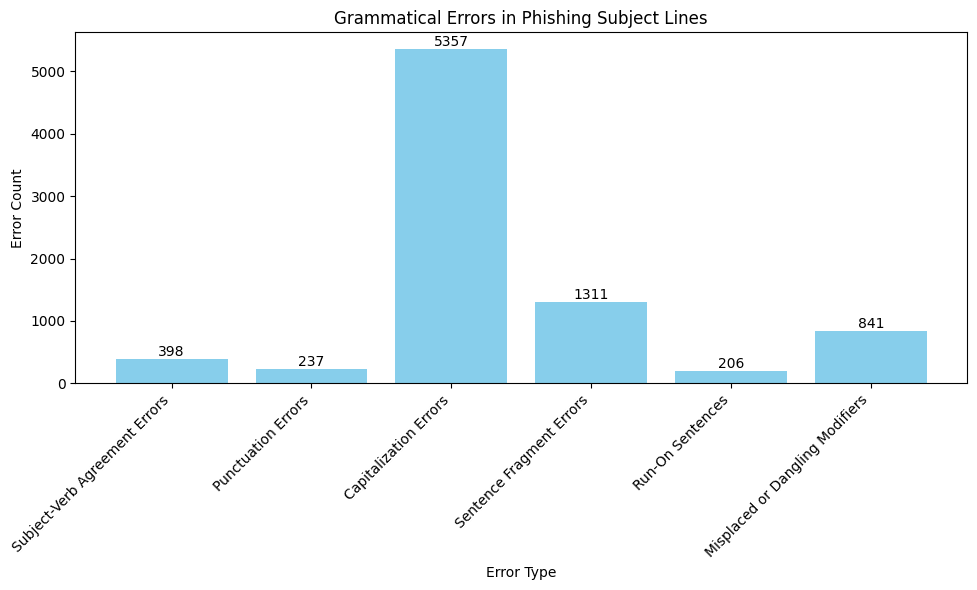

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Function to count different types of grammatical errors
def count_grammar_errors(subjects):
    error_counts = {
        'Subject-Verb Agreement Errors': 0,
        'Punctuation Errors': 0,
        'Capitalization Errors': 0,
        'Sentence Fragment Errors': 0,
        'Run-On Sentences': 0,
        'Misplaced or Dangling Modifiers': 0
    }

    for subject in subjects:
        tokens = word_tokenize(subject)
        tags = pos_tag(tokens)

        for i in range(len(tags)):
            word, tag = tags[i]

            # Subject-Verb Agreement Errors
            if tag.startswith('VB') and i < len(tags) - 1 and word_tokenize(tags[i + 1][0])[0].isalpha():
                error_counts['Subject-Verb Agreement Errors'] += 1

            # Punctuation Errors
            if word in ",.?!;" and i < len(tags) - 1 and tags[i + 1][0].isalpha():
                error_counts['Punctuation Errors'] += 1

            # Capitalization Errors
            if word.isalpha() and word[0].islower():
                error_counts['Capitalization Errors'] += 1

            # Sentence Fragment Errors
            if i == len(tags) - 1 and tag != '.':
                error_counts['Sentence Fragment Errors'] += 1

            # Run-On Sentences
            if tag == '.' and i < len(tags) - 2 and tags[i + 1][0].isalpha():
                error_counts['Run-On Sentences'] += 1

            # Misplaced or Dangling Modifiers
            if tag.startswith('JJ') and i < len(tags) - 1 and tags[i + 1][0].isalpha():
                error_counts['Misplaced or Dangling Modifiers'] += 1

    return error_counts

# Apply the function to phishing subject lines
phishing_subjects = data_nazario[data_nazario['label'] == 1]['subject']
phishing_errors = count_grammar_errors(phishing_subjects)

# Plot the results with count labels on top of each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(phishing_errors.keys(), phishing_errors.values(), color='skyblue')

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.title('Grammatical Errors in Phishing Subject Lines')
plt.xlabel('Error Type')
plt.ylabel('Error Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **EDA 14** Word cloud for phishing email bodies

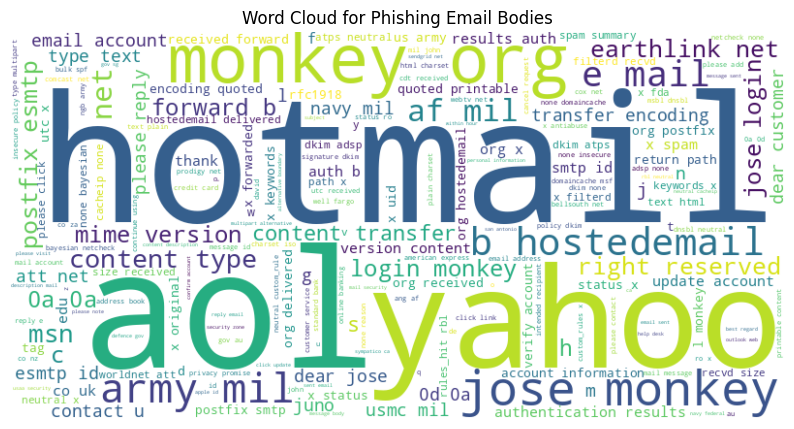

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

label_1_data = data_nazario[data_nazario['label'] == 1]

# Concatenate all email bodies into a single string
all_bodies_label_1 = ' '.join(label_1_data['body'].astype(str))
wordcloud_label_1 = WordCloud(width=800, height=400, background_color='white').generate(all_bodies_label_1)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_label_1, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Phishing Email Bodies')
plt.show()


#### Word cloud for phishing email subject

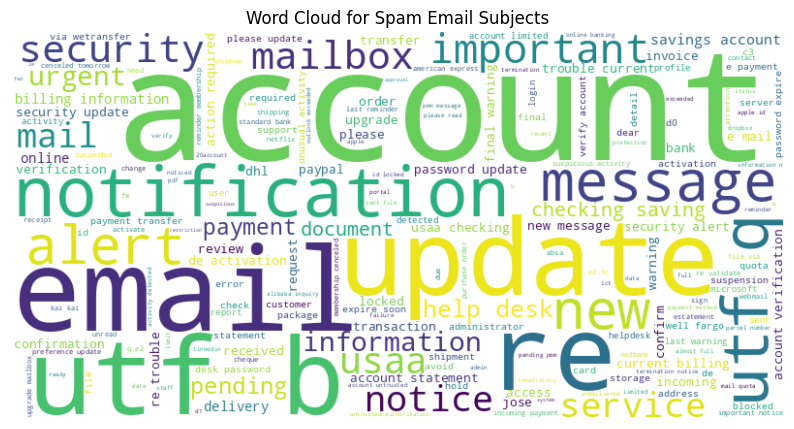

In [ ]:
# Filter the dataset to include only spam emails
spam_data = data_nazario[data_nazario['label'] == 1]

# Exclude specific keywords from the subject column
excluded_keywords = ['monkey', 'org']
filtered_spam_data = spam_data[~spam_data['subject'].str.contains('|'.join(excluded_keywords), case=False)]

# Concatenate all email bodies into a single string
all_spam_bodies_filtered = ' '.join(filtered_spam_data['subject'].astype(str))

# Generate a word cloud
wordcloud_spam_filtered = WordCloud(width=800, height=400, background_color='white').generate(all_spam_bodies_filtered)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_spam_filtered, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Email Subjects')
plt.show()

### **EDA 15** Count of File Extensions Found in Email Bodies

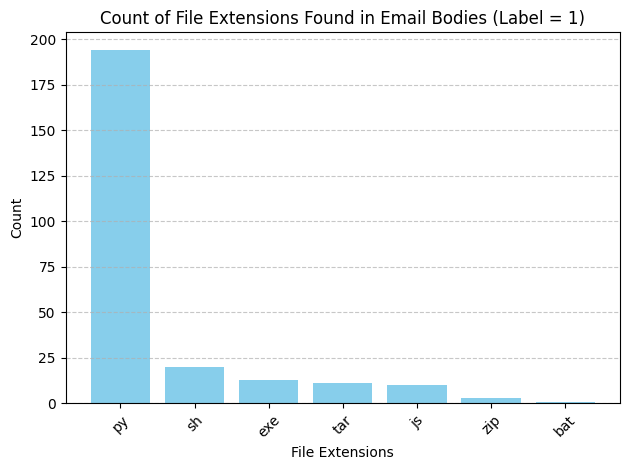

In [ ]:
data = pd.read_csv('Nazario_5.csv')
# Regular expression patterns
file_extensions_pattern = r'\b\w+\.(exe|msi|bat|cmd|jar|scr|js|vbs|ps1|sh|py|zip|rar|7z|tar|gzip|docm|xlsm|pptm|dotm)\b'
file_extensions_regex = re.compile(file_extensions_pattern, re.IGNORECASE)

# Function to search for file-related patterns in email bodies
def search_files_in_body(email_body):
    # Search for file extensions in the email body
    file_extensions_found = file_extensions_regex.findall(email_body.lower())

    return file_extensions_found

# Filter the data for instances where label equals 1
filtered_data = data[data['label'] == 0]

# Apply the function to each row in the filtered DataFrame
filtered_data['file_extensions_found'] = filtered_data['body'].apply(search_files_in_body)

# Flatten the list of file extensions found in all rows
all_file_extensions = [extension for sublist in filtered_data['file_extensions_found'] for extension in sublist]

# Count the occurrences of each file extension
total_counts = pd.Series(all_file_extensions).value_counts()

# Plot a bar graph
plt.bar(total_counts.index, total_counts.values, color='skyblue')
plt.title('Count of File Extensions Found in Email Bodies (Label = 1)')
plt.xlabel('File Extensions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **Basic statistics**

Let us show distribution of each of the column before that we need to create certain columns that is helpful for our analysis

- Utilize the sender variable and derive variables such as Length of email id, No of dots in email ID, No of dashes in email id Digits in email.
- Now using these numerical data try to extract patterns such as finding outliers in the data and show box plot, outliers check and show correlation between each features.

## **Sender Features**

| Column Name                  | Description                                                        |
|------------------------------|--------------------------------------------------------------------|
| lengthofEmailID              | Length of the email sender ID (characters)                         |
| noofDotsEmailId             | Number of dots (".") in the email sender ID                        |
| noofdashesemailid            | Number of dashes ("-") in the email sender ID                      |
| noofspecialcharactersemailid | Number of special characters in the email sender ID                |
| noofdigitsemail              | Number of digits in the email sender ID                            |
| noofsubdomainsemail          | Number of subdomains in the email sender ID (separated by "@")     |


In [ ]:
columns = ['lengthofEmailID', 'noofDotsEmailId', 'noofdashesemailid','noofspecialcharactersemailid','noofdigitsemail','noofsubdomainsemail']
numerical_data = pd.DataFrame(columns=columns)
numerical_data['lengthofEmailID'] = data_nazario['sender'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
numerical_data['noofDotsEmailId'] = data_nazario['sender'].apply(lambda x: str(x).count('.') if pd.notnull(x) else 0)
numerical_data['noofdashesemailid'] = data_nazario['sender'].apply(lambda x: str(x).count('-') if pd.notnull(x) else 0)
numerical_data['noofspecialcharactersemailid'] = data_nazario['sender'].apply(lambda x: sum(c in r'~!@#$%^&*()_+{}|:"<>?`-=[]\;\',./' for c in str(x)) if pd.notnull(x) else 0)
numerical_data['noofdigitsemail'] = data_nazario['sender'].apply(lambda x: sum(c.isdigit() for c in str(x)) if pd.notnull(x) else 0)
numerical_data['noofsubdomainsemail'] = data_nazario['sender'].apply(lambda x: str(x).count('@') - 1 if pd.notnull(x) else 0)


##**Body Features**

| Column Name           | Formula or Derivation                        | Description                                      |
|-----------------------|---------------------------------------------|--------------------------------------------------|
| body_html             | Binary: Presence of HTML tags               | Indicates HTML tags presence in email body.      |
| body_forms            | Binary: Presence of HTML forms              | Indicates presence of forms in HTML body.        |
| body_no Words         | Count of words                              | Total number of words in the email body.         |
| body_no Characters    | Count of characters                         | Total number of characters in email body.        |
| body_noDistinct Words | Count of unique words                       | Total number of unique words in email body.      |
| body_richness         | body_noWords / body_noCharacters            | Ratio of words to characters in email body.      |
| body_noFunction Words | Count of specific function words            | Total occurrences of predefined words.          |
| body_suspension       | Binary: Presence of "suspension"           | Presence of word "suspension" in body.           |
| body_verify YourAccount | Binary: Presence of "verify"              | Presence of phrase "verify your account".        |


In [ ]:
import pandas as pd
import re



# Initialize binary feature columns with default value 0
numerical_data['body_html'] = 0
numerical_data['body_forms'] = 0
numerical_data['body_no Words'] = 0
numerical_data['body_no Characters'] = 0
numerical_data['body_noDistinct Words'] = 0
numerical_data['body_richness'] = 0.0
numerical_data['body_noFunction Words'] = 0
numerical_data['body_suspension'] = 0
numerical_data['body_verify YourAccount'] = 0

# Define regular expressions for detecting patterns
html_tag_regex = re.compile(r'<[^>]+>')
form_regex = re.compile(r'<form\b')
function_words = ['account', 'access', 'bank', 'credit', 'click', 'identity', 'inconvenience',
                  'information', 'limited', 'log', 'minutes', 'password', 'recently', 'risk',
                  'social', 'security', 'service', 'suspended']
suspension_regex = re.compile(r'\bsuspension\b', re.IGNORECASE)
verify_account_regex = re.compile(r'\bverify your account\b', re.IGNORECASE)

# Iterate over each row in the DataFrame
for index, row in data_nazario.iterrows():
    # Extract email body and convert it to a string
    body = str(row['body'])

    # Check for presence of HTML tags in the email body
    if re.search(html_tag_regex, body):
        numerical_data.at[index, 'body_html'] = 1

    # Check for presence of forms in the HTML email body
    if re.search(form_regex, body):
        numerical_data.at[index, 'body_forms'] = 1

    # Count the total number of words in the email body
    word_count = len(body.split())
    numerical_data.at[index, 'body_no Words'] = word_count

    # Count the total number of characters in the email body
    character_count = len(body)
    numerical_data.at[index, 'body_no Characters'] = character_count

    # Count the total number of distinct words in the email body
    distinct_words_count = len(set(body.split()))
    numerical_data.at[index, 'body_noDistinct Words'] = distinct_words_count

    # Calculate the ratio of the number of words to the number of characters
    if character_count > 0:
        numerical_data.at[index, 'body_richness'] = word_count / character_count

    # Count the total number of occurrences of function words in the email body
    function_word_count = sum(body.lower().count(word) for word in function_words)
    numerical_data.at[index, 'body_noFunction Words'] = function_word_count

    # Check for the presence of the word "suspension" in the email body
    if re.search(suspension_regex, body):
        numerical_data.at[index, 'body_suspension'] = 1

    # Check for the presence of the phrase "verify your account" in the email body
    if re.search(verify_account_regex, body):
        numerical_data.at[index, 'body_verify YourAccount'] = 1



## **URL Based features**

| Column Name        | Formula or Derivation                                          | Description                                                     |
|--------------------|----------------------------------------------------------------|-----------------------------------------------------------------|
| url_ipAddress     | Binary (0 or 1) indicating presence of IP addresses in URLs    | Presence of IP addresses in URLs                                |
| url_noIpAddresses | Count of URLs containing IP addresses                          | Total number of URLs containing IP addresses                    |
| url_atSymbol      | Binary (0 or 1) indicating presence of "@" symbols in URLs     | Presence of "@" symbols in URLs                                 |
| url_noLinks       | Count of total URLs in the email body                          | Total number of URLs in the email body                          |
| url_noIntLinks    | Count of internal links among the URLs                         | Number of internal links among the URLs (e.g., linking to the same domain) |
| url_noExtLinks    | Count of external links among the URLs                         | Number of external links among the URLs (e.g., linking to different domains) |
| url_noImgLinks    | Count of URLs requiring image clicks                          | Number of URLs requiring clicks on images                       |
| url_noDomains     | Count of distinct domains in the URLs                          | Total number of distinct domains in the URLs                   |
| url_maxNoPeriods  | Maximum number of periods in the domain names                  | Maximum number of periods in the domain names                  |
| url_linkText      | Binary (0 or 1) indicating specific terms in link text         | Presence of specific terms (e.g., "click", "login", "update") in link text |
| url_nonModalHereLinks | Binary (0 or 1) indicating "here" links to non-modal domains | Presence of "here" links that link to a domain other than the modal domain |
| url_ports         | Binary (0 or 1) indicating presence of ports other than 80    | Presence of URLs accessing ports other than port 80            |
| url_noPorts       | Count of URLs containing port information                     | Total number of UR


In [ ]:
# Initialize binary and continuous feature columns with default value 0

import pandas as pd
import re
from urllib.parse import urlparse

numerical_data['url_ipAddress'] = 0
numerical_data['url_noIpAddresses'] = 0
numerical_data['url_atSymbol'] = 0
numerical_data['url_noLinks'] = 0
numerical_data['url_noIntLinks'] = 0
numerical_data['url_noExtLinks'] = 0
numerical_data['url_noImgLinks'] = 0
numerical_data['url_noDomains'] = 0
numerical_data['url_maxNoPeriods'] = 0
numerical_data['url_linkText'] = 0
numerical_data['url_nonModalHereLinks'] = 0
numerical_data['url_ports'] = 0
numerical_data['url_noPorts'] = 0

# Define regular expressions for detecting patterns
ip_address_regex = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b')
at_symbol_regex = re.compile(r'@')
click_here_login_update_regex = re.compile(r'\bclick\b|\bhere\b|\blogin\b|\bupdate\b', re.IGNORECASE)

# Iterate over each row in the numerical_dataFrame
for index, row in data_nazario.iterrows():
    # Extract email body and convert it to a string
    body = str(row['body'])

    # Extract URLs from the email body
    urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', body)

    # Count the total number of links in the email body
    numerical_data.at[index, 'url_noLinks'] = len(urls)

    # Initialize lists to store domain and port information
    domains = []
    ports = []

    # Iterate over each URL
    for url in urls:
        # Parse the URL
        parsed_url = urlparse(url)

        # Check if the URL contains an IP address
        if re.search(ip_address_regex, parsed_url.netloc):
            numerical_data.at[index, 'url_ipAddress'] = 1
            numerical_data.at[index, 'url_noIpAddresses'] += 1

        # Check if the URL contains an "@" symbol
        if re.search(at_symbol_regex, parsed_url.netloc):
            numerical_data.at[index, 'url_atSymbol'] = 1

        # Count the number of periods in the domain
        period_count = parsed_url.netloc.count('.')
        if period_count > numerical_data.at[index, 'url_maxNoPeriods']:
            numerical_data.at[index, 'url_maxNoPeriods'] = period_count

        # Store domain and port information
        domains.append(parsed_url.netloc)
        ports.append(parsed_url.port)

    # Count the number of distinct domains
    numerical_data.at[index, 'url_noDomains'] = len(set(domains))

    # Count the number of internal and external links
    internal_links = [url for url in urls if 'example.com' in url]  # Example internal domain
    external_links = list(set(urls) - set(internal_links))
    numerical_data.at[index, 'url_noIntLinks'] = len(internal_links)
    numerical_data.at[index, 'url_noExtLinks'] = len(external_links)

    # Count the number of links requiring image clicks
    image_links = [url for url in urls if re.search(r'\.(?:jpg|jpeg|png|gif)$', url)]
    numerical_data.at[index, 'url_noImgLinks'] = len(image_links)

    # Count the number of links containing port information
    port_links = [url for url in urls if urlparse(url).port is not None]
    numerical_data.at[index, 'url_noPorts'] = len(port_links)

    # Check if the human-readable link text contains specific terms
    if re.search(click_here_login_update_regex, body):
        numerical_data.at[index, 'url_linkText'] = 1

    # Check if there are "here" links that link to a domain other than the modal domain
    if 'here' in body.lower() and any(domain != 'example.com' for domain in domains):
        numerical_data.at[index, 'url_nonModalHereLinks'] = 1

    # Check if any URL accesses ports other than 80
    if any(port not in (None, 80) for port in ports):
        numerical_data.at[index, 'url_ports'] = 1

## **Subject Based Features:**

| Column Name          | Formula or Derivation             | Description                                                |
|----------------------|----------------------------------|------------------------------------------------------------|
| subj_reply           | Binary                           | Indicates presence (1) or absence (0) of "Re:" in subject. |
| subj_forward         | Binary                           | Indicates presence (1) or absence (0) of "Fwd:" in subject. |
| subj_no Words        | Count of words                   | Total number of words in the subject line.                 |
| subj_no Characters   | Count of characters              | Total number of characters in the subject line.            |
| subj_richness        | subj_noWords / subj_noCharacters | Ratio of words to characters in the subject line.           |
| subj_verify          | Binary                           | Indicates presence (1) or absence (0) of the word "verify" in the subject. |
| subj_debit           | Binary                           | Indicates presence (1) or absence (0) of the word "debit" in the subject.  |
| subj_bank            | Binary                           | Indicates presence (1) or absence (0) of the word "bank" in the subject.   |


In [ ]:
# Initialize binary feature columns with default value 0
numerical_data['subj_reply'] = 0
numerical_data['subj_forward'] = 0
numerical_data['subj_noWords'] = 0
numerical_data['subj_noCharacters'] = 0
numerical_data['subj_richness'] = 0.0
numerical_data['subj_verify'] = 0
numerical_data['subj_debit'] = 0
numerical_data['subj_bank'] = 0

# Define regular expressions for detecting patterns
reply_regex = re.compile(r'^Re:', re.IGNORECASE)
forward_regex = re.compile(r'^Fwd?:', re.IGNORECASE)
verify_regex = re.compile(r'\bverify\b', re.IGNORECASE)
debit_regex = re.compile(r'\bdebit\b', re.IGNORECASE)
bank_regex = re.compile(r'\bbank\b', re.IGNORECASE)

# Iterate over each row in the numerical_dataFrame
for index, row in data_nazario.iterrows():
    # Extract subject line and convert it to a string
    subject = str(row['subject'])

    # Check if the subject line indicates a reply
    if re.search(reply_regex, subject):
        numerical_data.at[index, 'subj_reply'] = 1

    # Check if the subject line indicates a forward
    if re.search(forward_regex, subject):
        numerical_data.at[index, 'subj_forward'] = 1

    # Count the total number of words in the subject line
    word_count = len(subject.split())
    numerical_data.at[index, 'subj_noWords'] = word_count

    # Count the total number of characters in the subject line
    character_count = len(subject)
    numerical_data.at[index, 'subj_noCharacters'] = character_count

    # Calculate the richness of the subject line
    if character_count > 0:
        numerical_data.at[index, 'subj_richness'] = word_count / character_count

    # Check if the word "verify" appears in the subject line
    if re.search(verify_regex, subject):
        numerical_data.at[index, 'subj_verify'] = 1

    # Check if the word "debit" appears in the subject line
    if re.search(debit_regex, subject):
        numerical_data.at[index, 'subj_debit'] = 1

    # Check if the word "bank" appears in the subject line
    if re.search(bank_regex, subject):
        numerical_data.at[index, 'subj_bank'] = 1

Skewness of lengthofEmailID is  0.9845326185156933


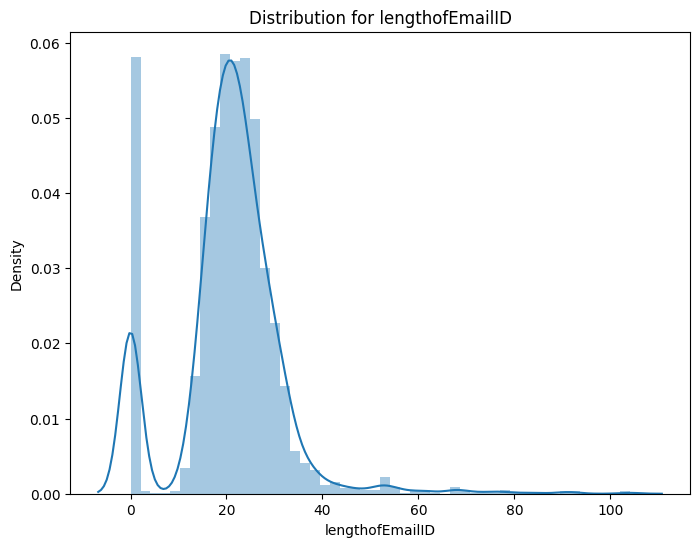

Skewness of noofDotsEmailId is  1.742193073439195


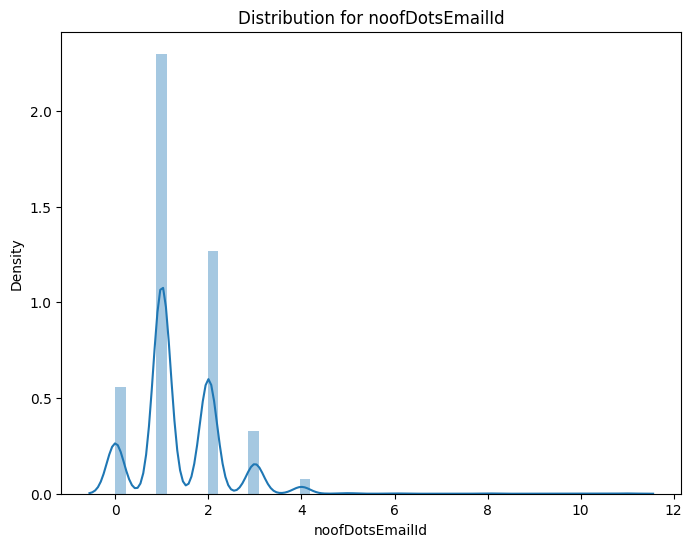

Skewness of noofdashesemailid is  4.365506698341376


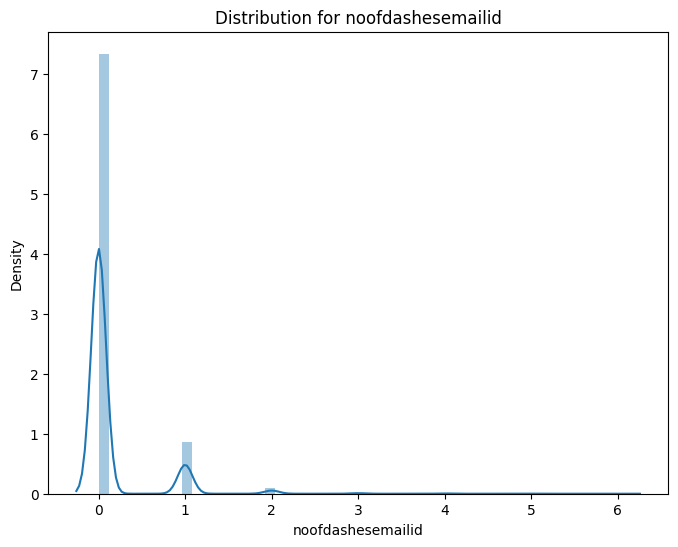

Skewness of noofspecialcharactersemailid is  1.2545754265694613


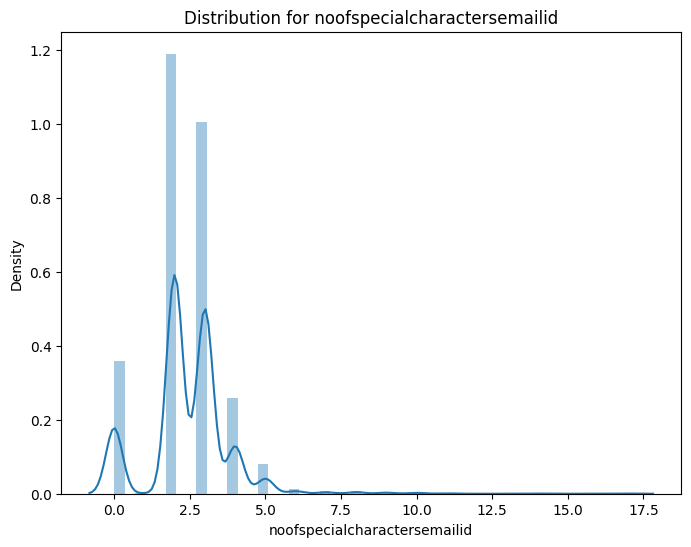

Skewness of noofdigitsemail is  15.757022158503187


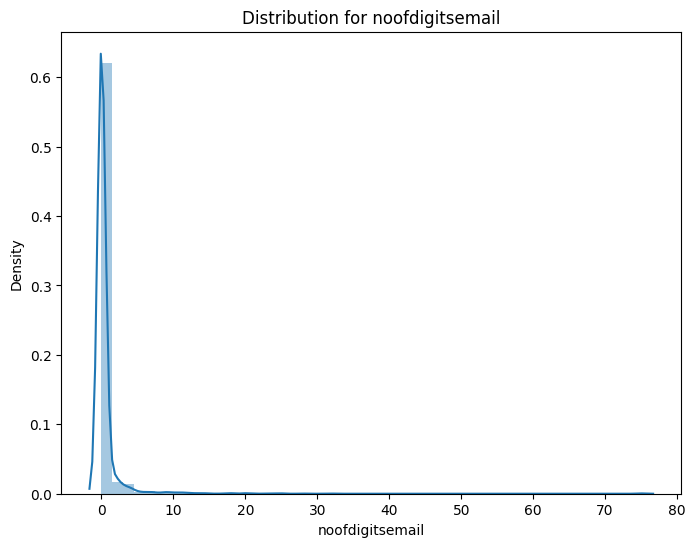

Skewness of noofsubdomainsemail is  -14.196319642723926


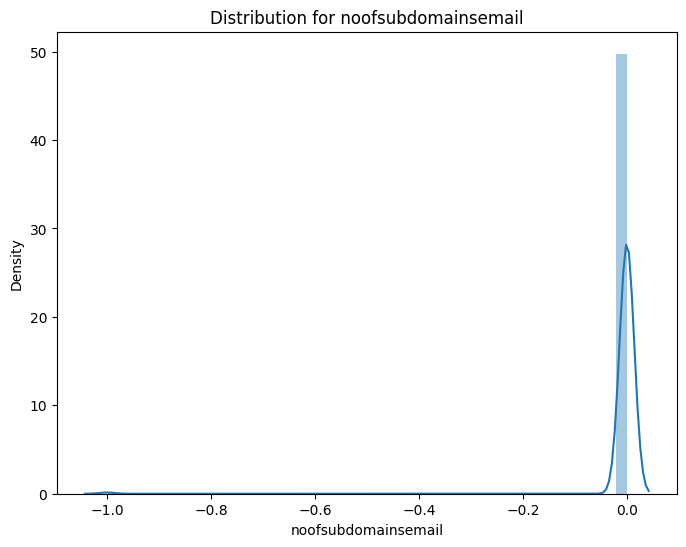

Skewness of body_html is  2.9591254983840702


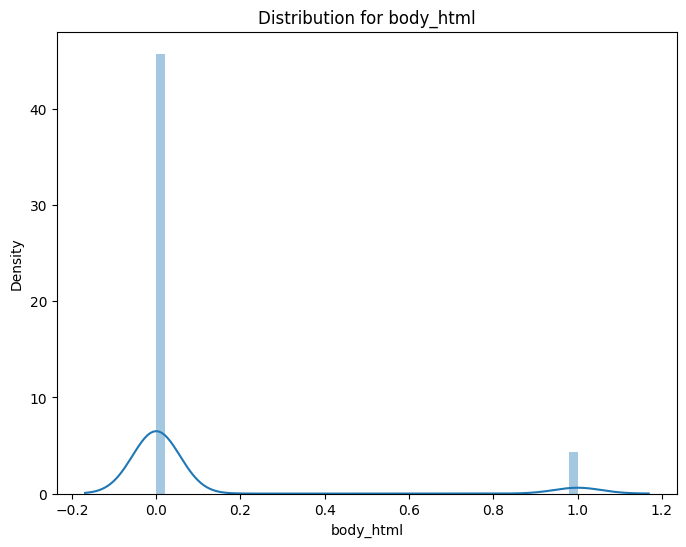

Skewness of body_forms is  0


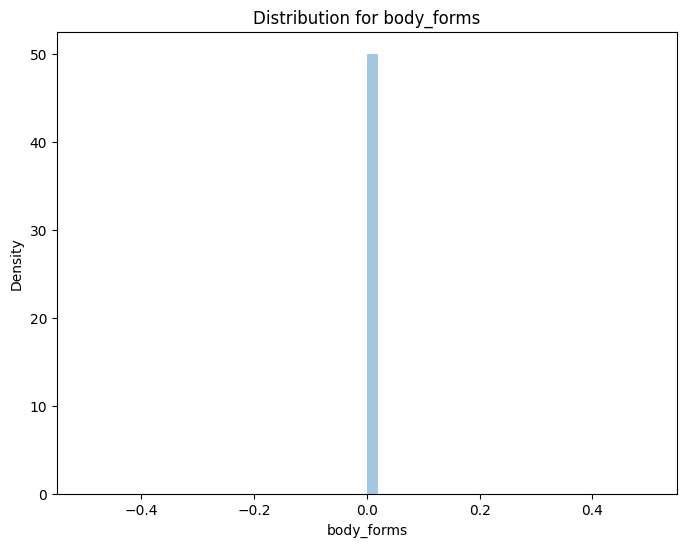

Skewness of body_no Words is  38.75062857664247


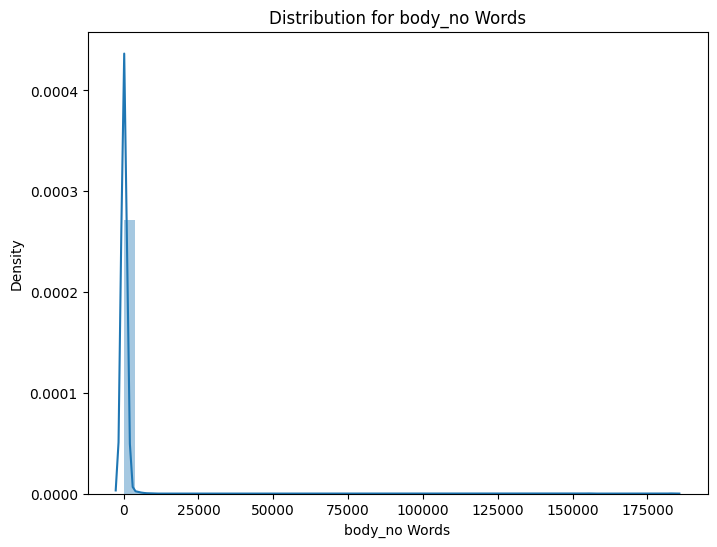

Skewness of body_no Characters is  51.09630720064743


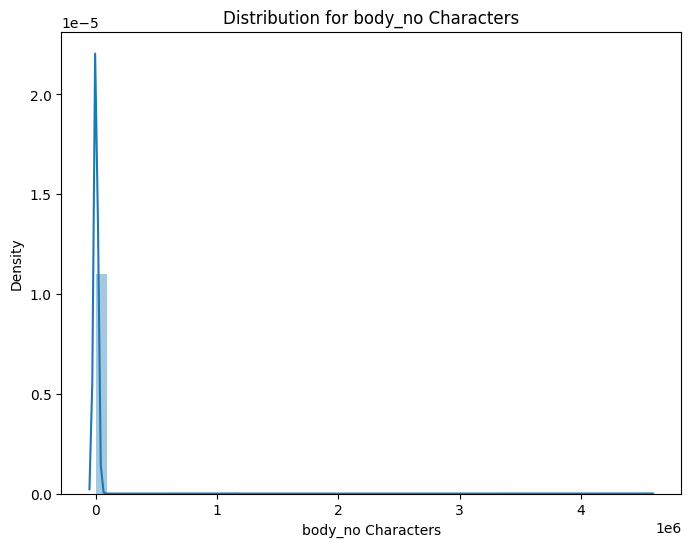

Skewness of body_noDistinct Words is  43.975650529032094


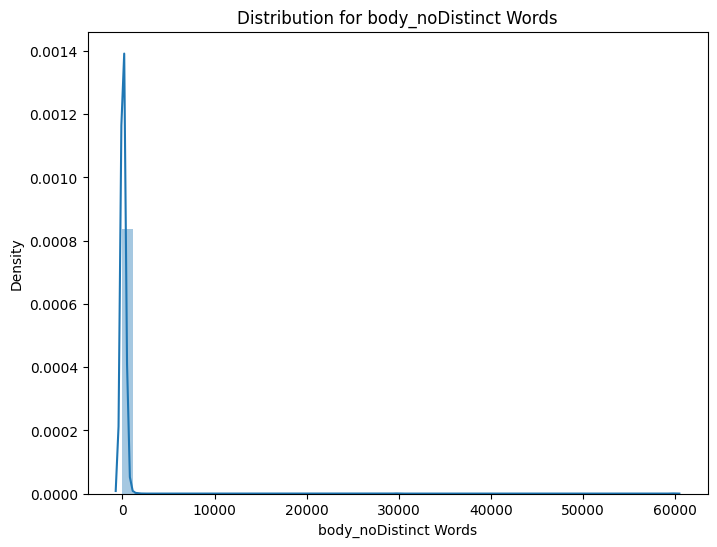

Skewness of body_richness is  7.641988400234706


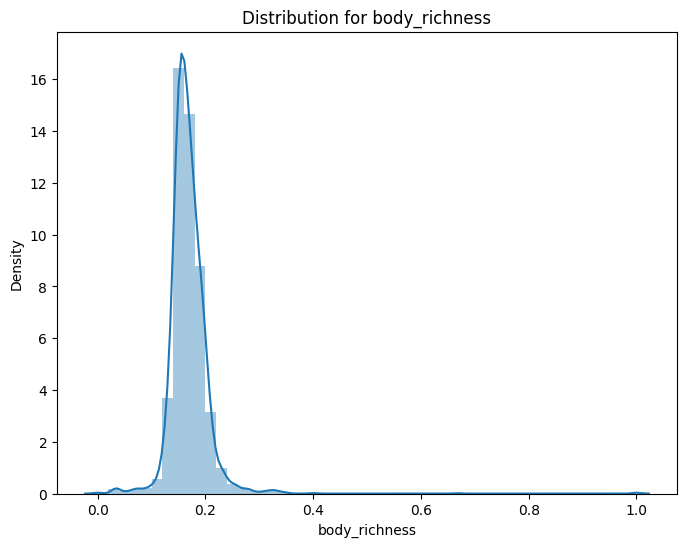

Skewness of body_noFunction Words is  50.73521494485046


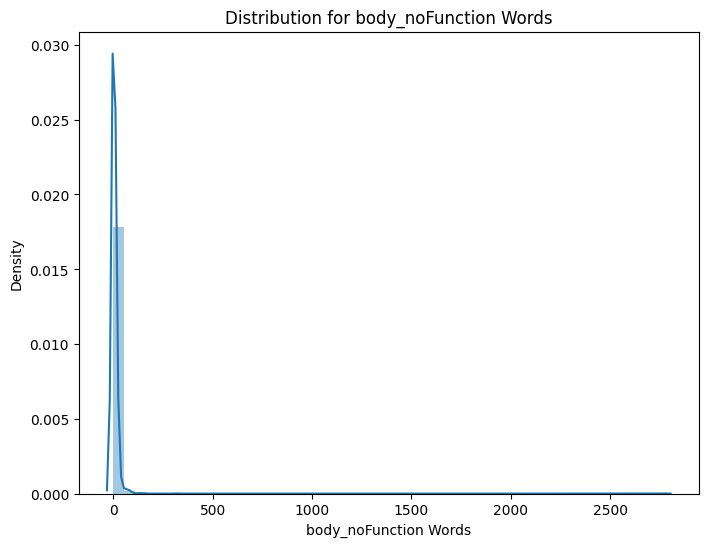

Skewness of body_suspension is  8.370104503683875


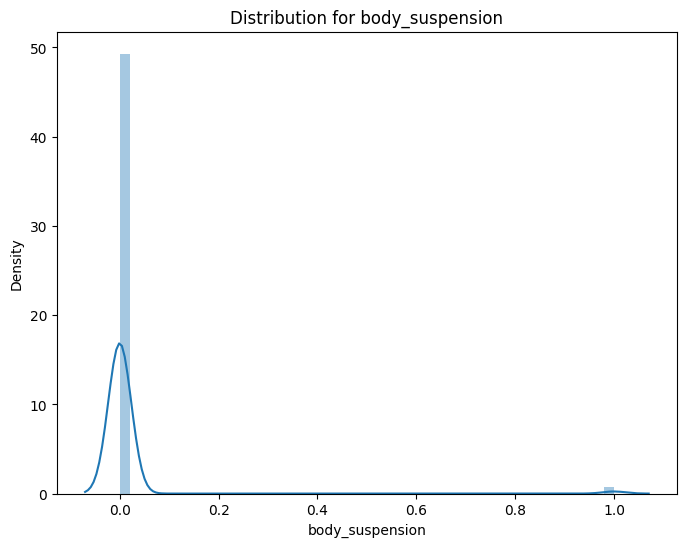

Skewness of body_verify YourAccount is  0


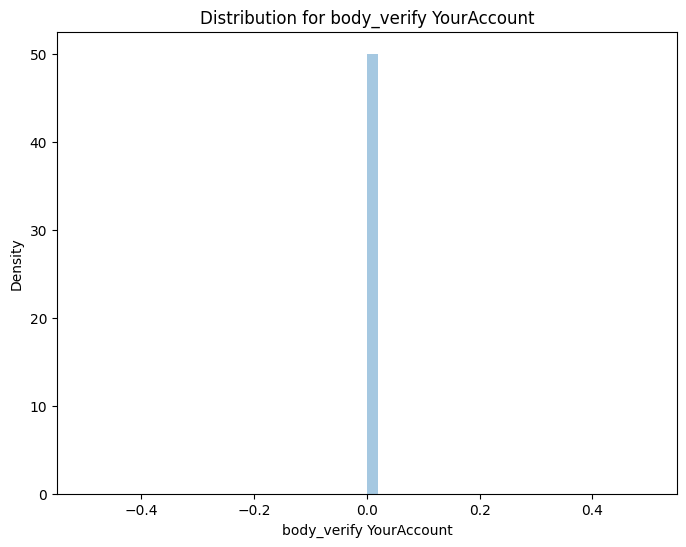

Skewness of url_ipAddress is  0


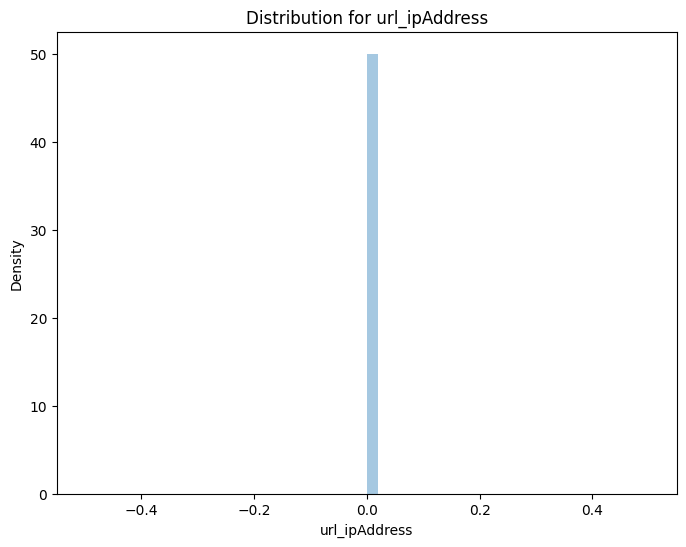

Skewness of url_noIpAddresses is  0


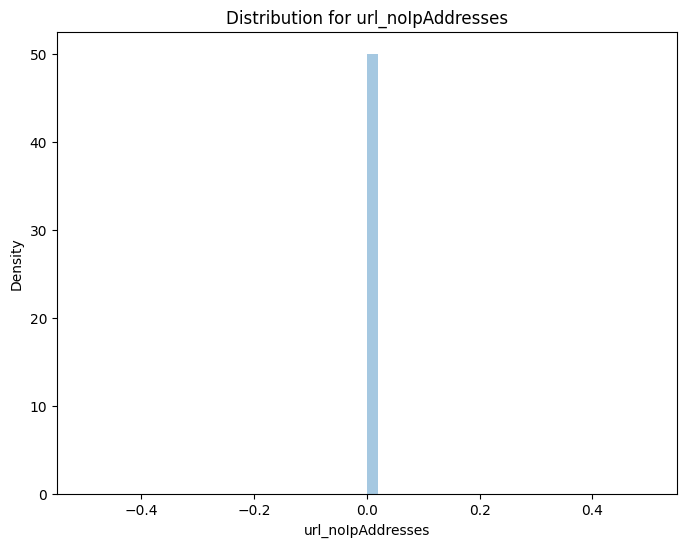

Skewness of url_atSymbol is  0


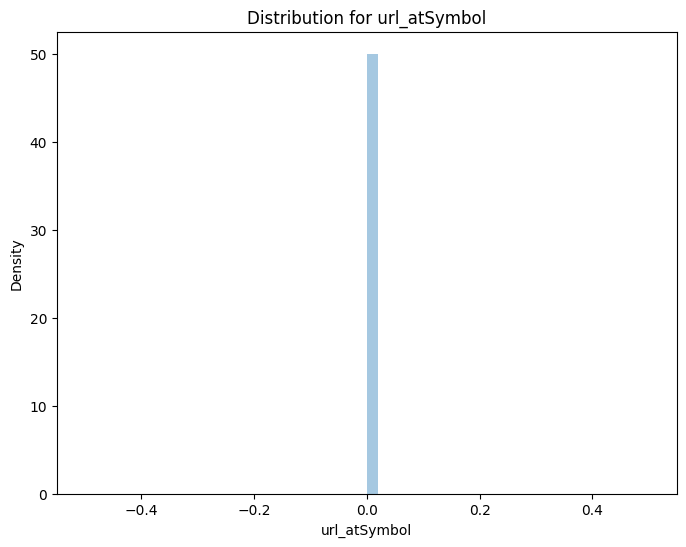

Skewness of url_noLinks is  0


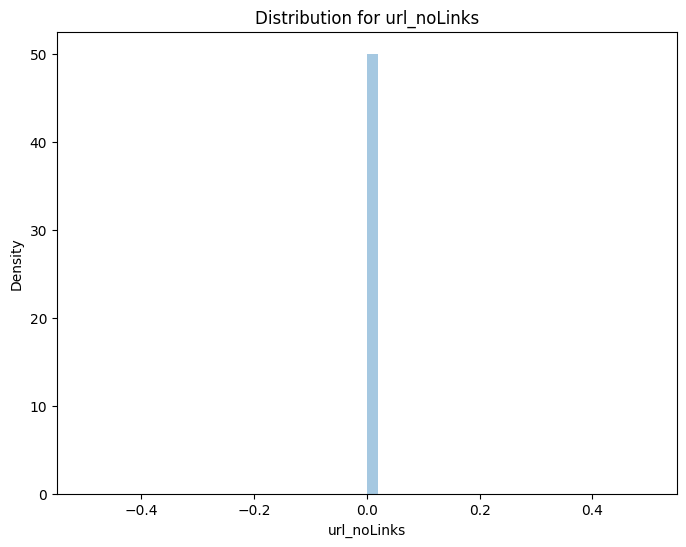

Skewness of url_noIntLinks is  0


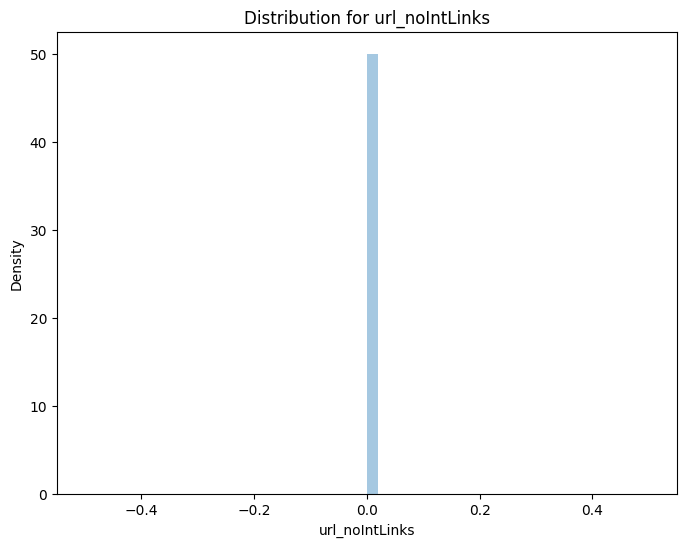

Skewness of url_noExtLinks is  0


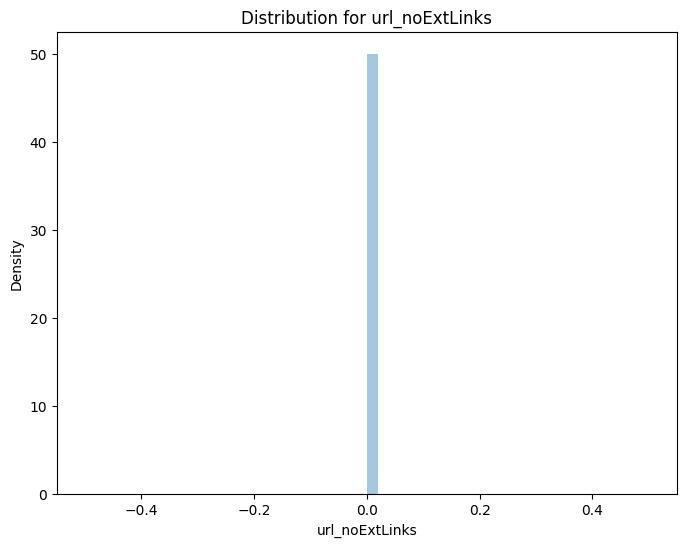

Skewness of url_noImgLinks is  0


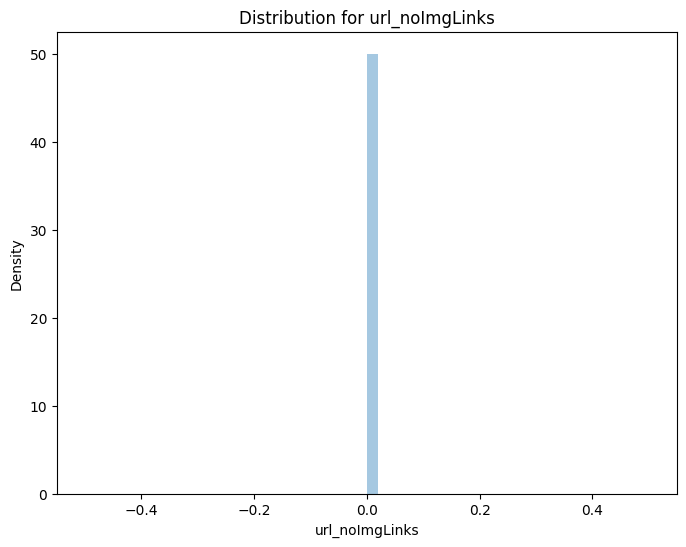

Skewness of url_noDomains is  0


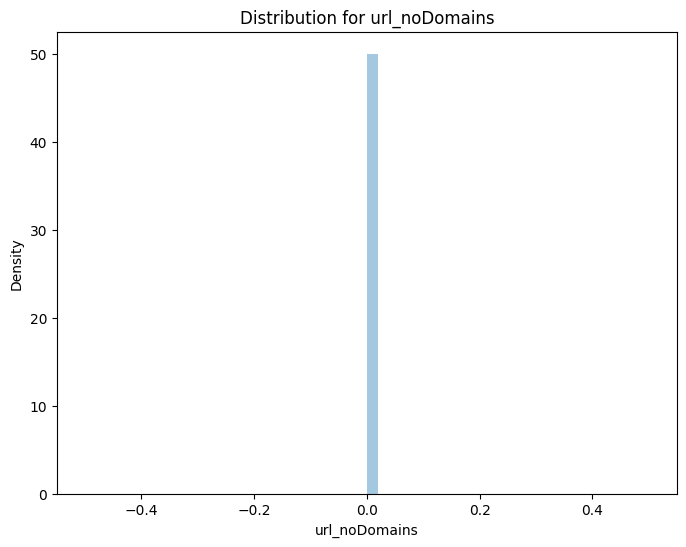

Skewness of url_maxNoPeriods is  0


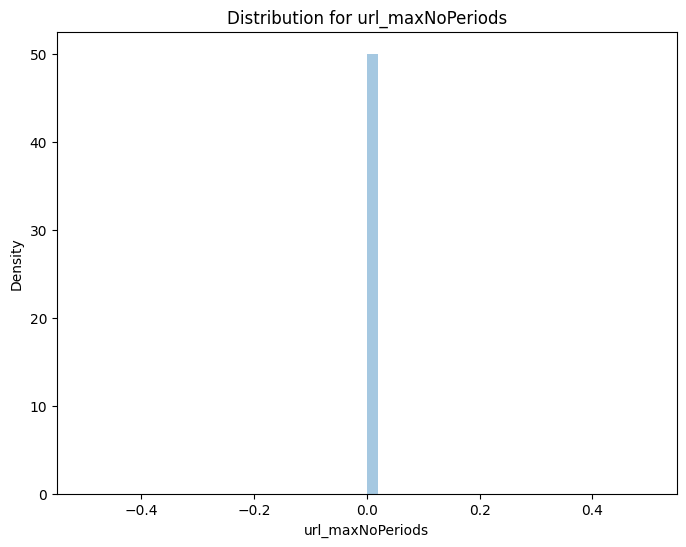

Skewness of url_linkText is  0.2909332356228715


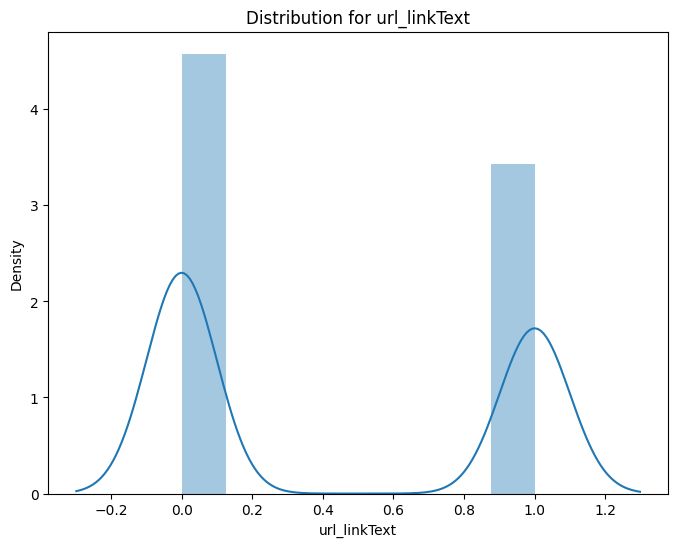

Skewness of url_nonModalHereLinks is  0


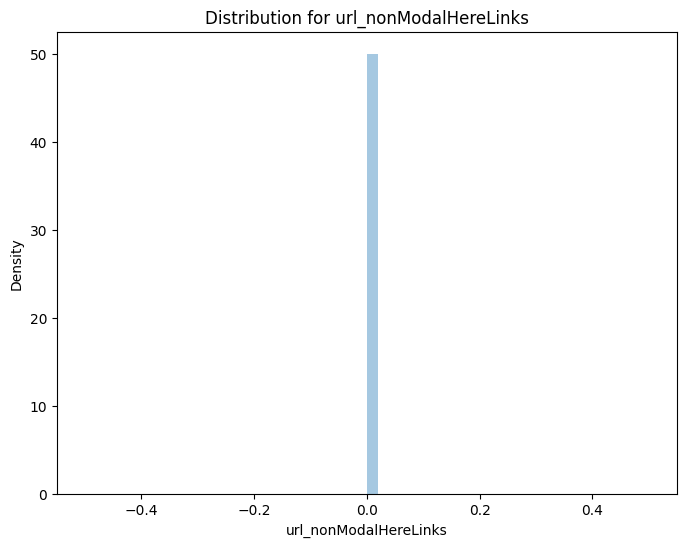

Skewness of url_ports is  0


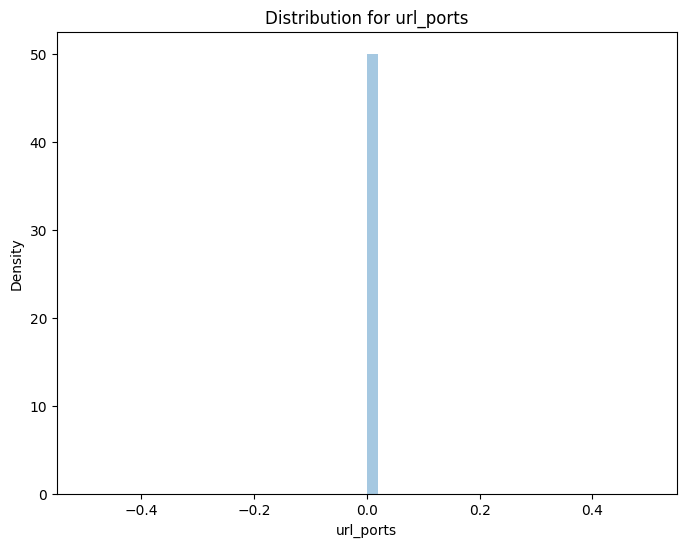

Skewness of url_noPorts is  0


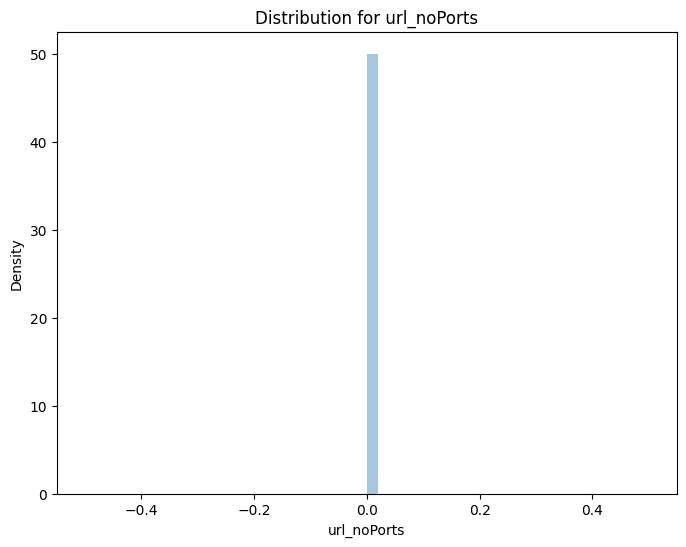

Skewness of subj_reply is  0


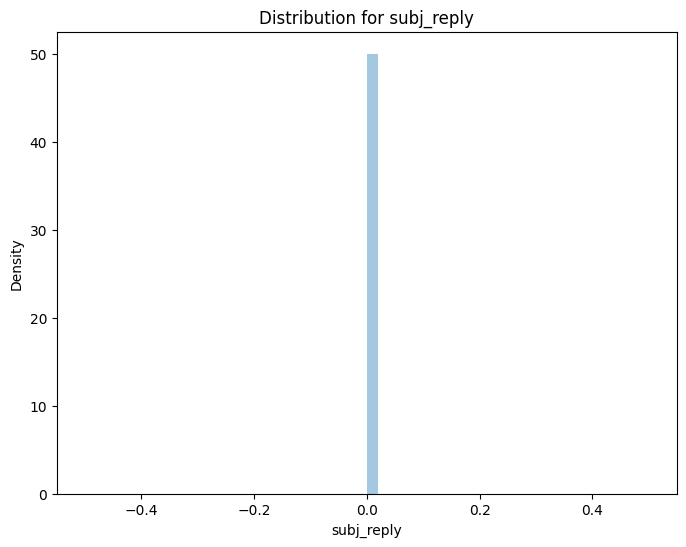

Skewness of subj_forward is  0


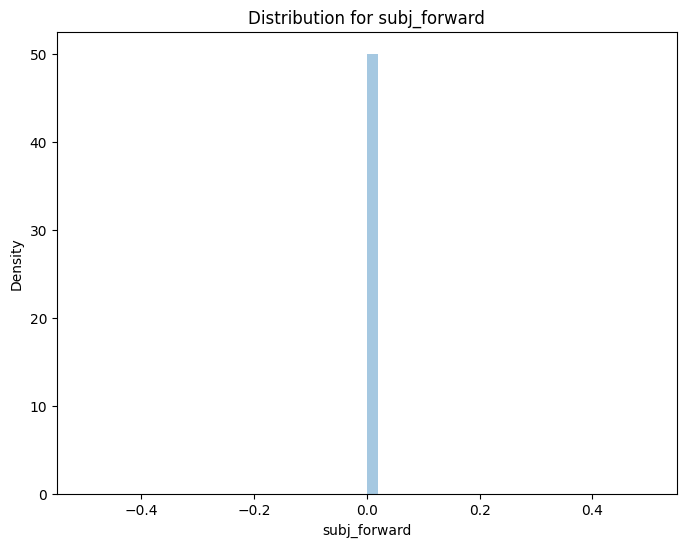

Skewness of subj_noWords is  4.351353743535886


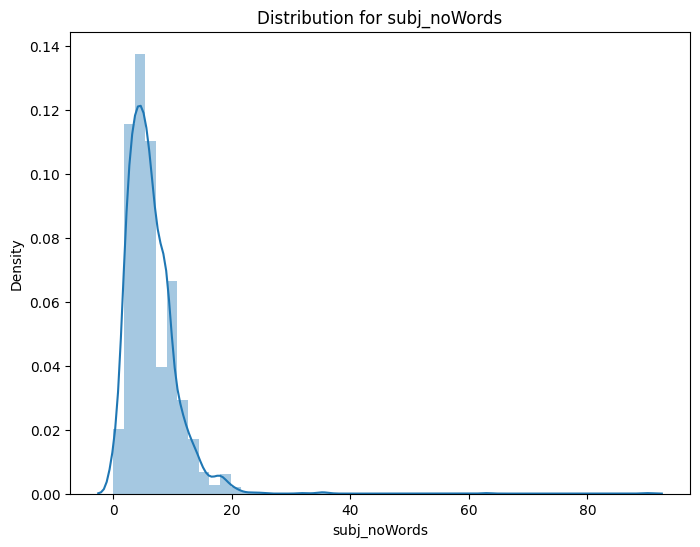

Skewness of subj_noCharacters is  6.070682641754399


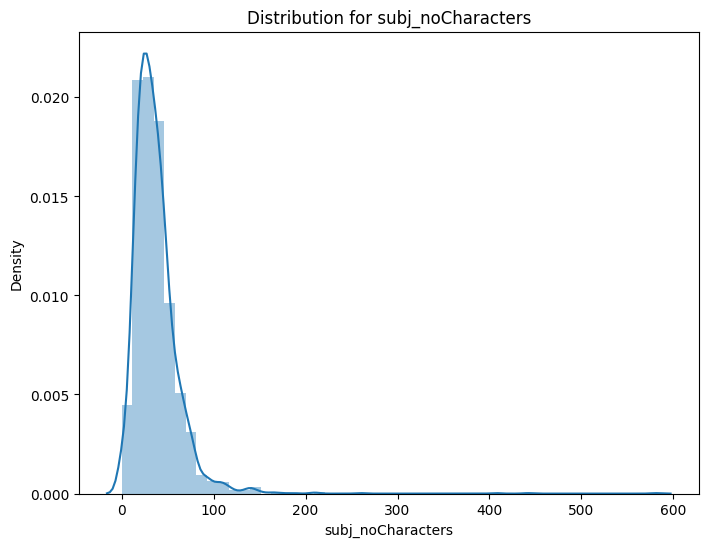

Skewness of subj_richness is  0.4198576494346069


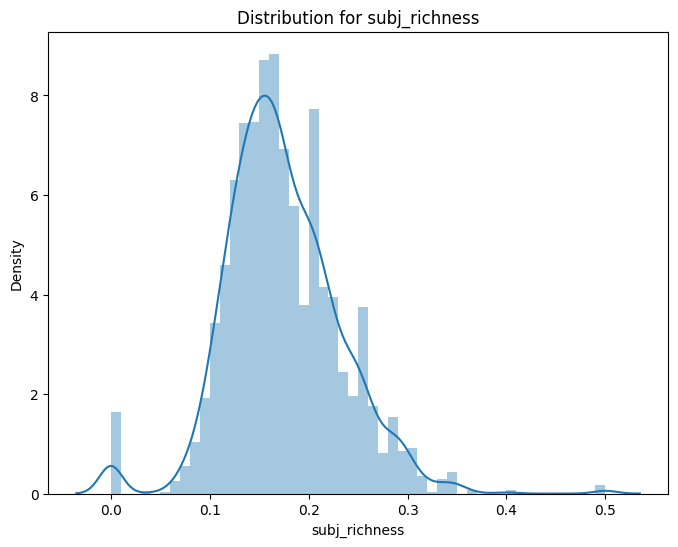

Skewness of subj_verify is  10.323653015631793


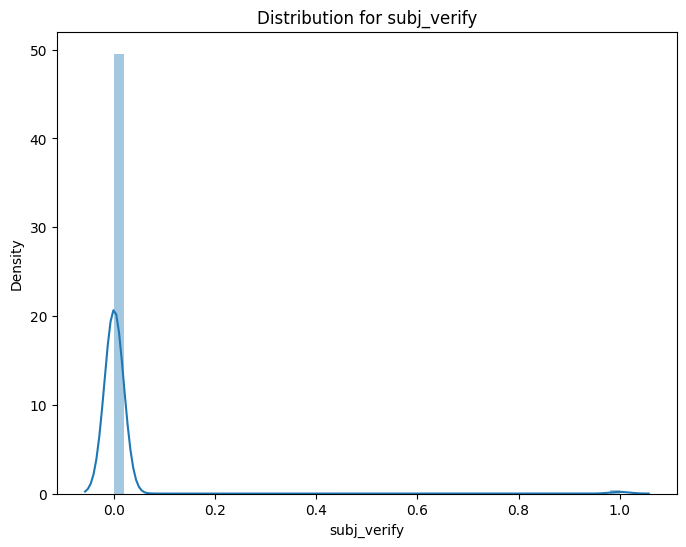

Skewness of subj_debit is  27.640532233814774


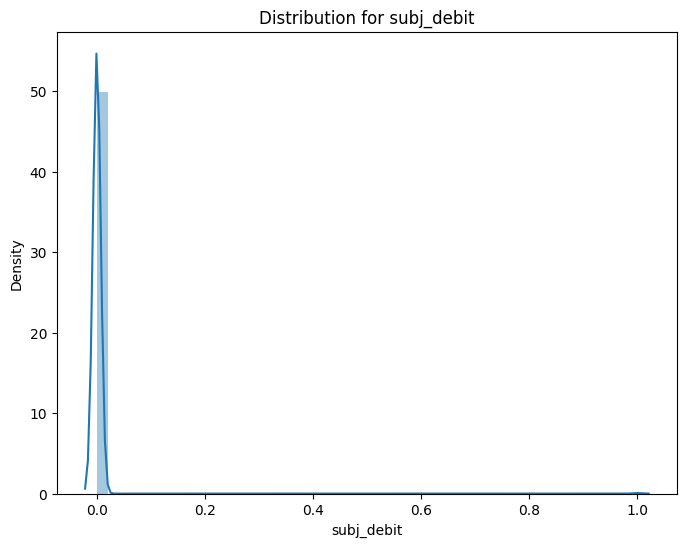

Skewness of subj_bank is  10.323653015631791


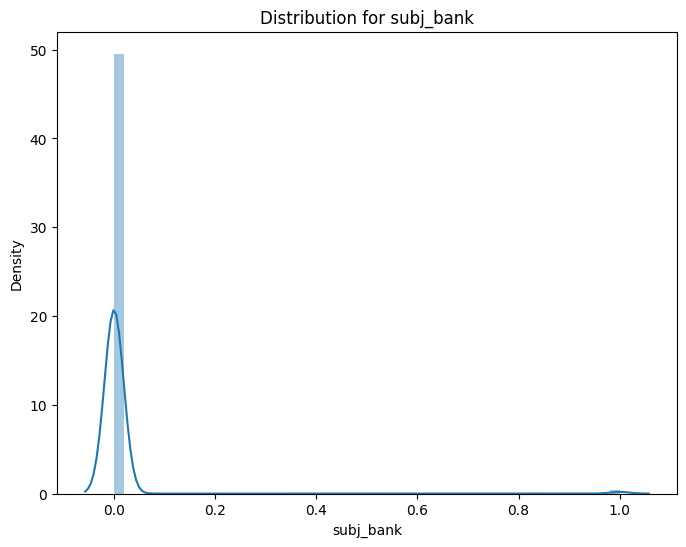

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_names = numerical_data.columns

for column in columns_names:
    plt.figure(figsize=(8, 6))
    plt.title(f'Distribution for {column}')
    sns.distplot(numerical_data[column], axlabel=column)
    print(f"Skewness of {column} is ", numerical_data[column].skew())
    plt.show()


### Notes on Distribution of numerical_numerical_data after sender column was converted into numerical numerical_data with various fields
1. Length of email ID has skeweness value 0.98 which means it is **right skewed distribution**
2. No of dots in email has skewness value 1.742 which means it is **Positively skewed complex data which needs further processing**
3. No of dashes in email has skewness value 4.356 which means it is **Positively skewed**
4. No of special characters in email has skewness value 1.245 which means it is **Positively skewed complex data which needs further processing**
5. No of digits in email has skewness value 15.757 which means it is **Right skewed distribution**
6. No of subdomains in email has skewness value -14.1 which means it is **Left skewed distribution**

### **Outliers calculation**

- We can see clearly the number of outliers for each column. Box plot representation is also shown.

In [ ]:
def calculate_outlier(column):
    """
    Function to calculate outlier based on the column passed.
    Returns lower limit, upper limit, IQR, and outliers.
    """
    data_values = column.dropna().values
    sorted_list = sorted(data_values)

    outliers = set()  # Since we want unique values

    n = len(sorted_list)
    q1 = n // 4
    q3 = (3 * q1 )

    q1_value = sorted_list[q1]  # Python is indexed from 0
    q3_value = sorted_list[q3]

    IQR = q3_value - q1_value

    lower_limit = q1_value - (1.5 * IQR)
    upper_limit = q3_value + (1.5 * IQR)

    for value in sorted_list:
        if value < lower_limit or value > upper_limit:
            outliers.add(value)


    return lower_limit, upper_limit, IQR, outliers

Total Number of outliers in column lengthofEmailID is 40

 Outliers for column lengthofEmailID are {0, 3, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 67, 68, 69, 70, 72, 74, 75, 77, 80, 83, 85, 90, 91, 92, 104} respectively.


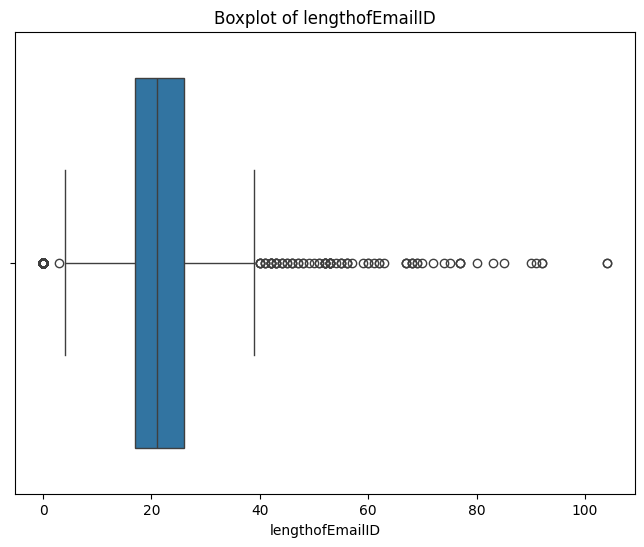

Total Number of outliers in column noofDotsEmailId is 6

 Outliers for column noofDotsEmailId are {4, 5, 6, 8, 9, 11} respectively.


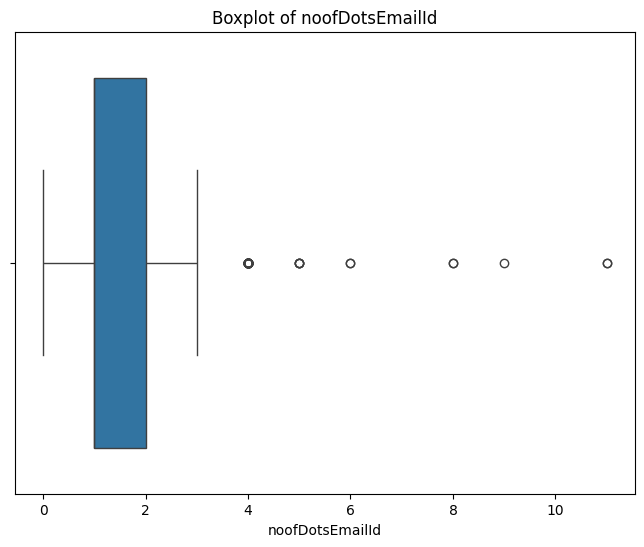

Total Number of outliers in column noofdashesemailid is 6

 Outliers for column noofdashesemailid are {1, 2, 3, 4, 5, 6} respectively.


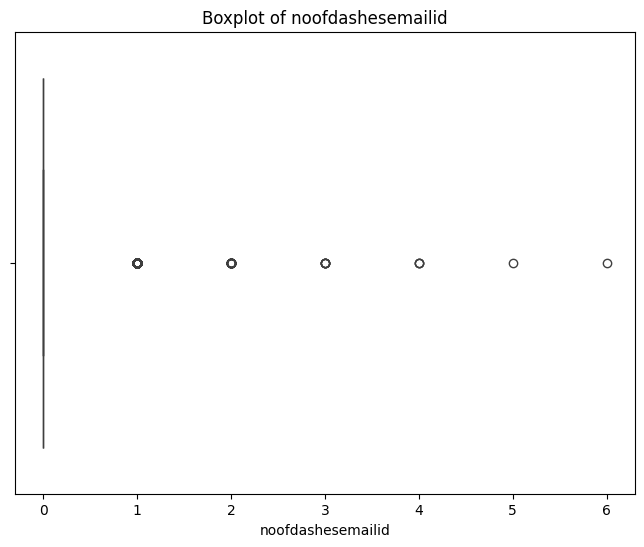

Total Number of outliers in column noofspecialcharactersemailid is 10

 Outliers for column noofspecialcharactersemailid are {0, 5, 6, 7, 8, 9, 10, 11, 14, 17} respectively.


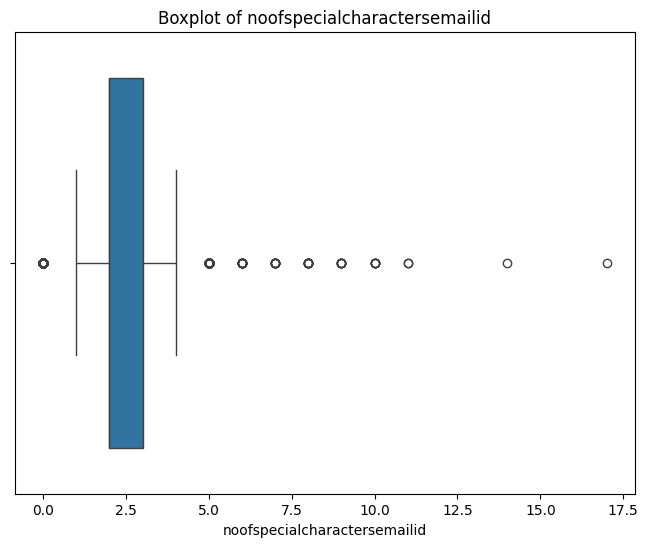

Total Number of outliers in column noofdigitsemail is 25

 Outliers for column noofdigitsemail are {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21, 23, 24, 25, 28, 32, 75} respectively.


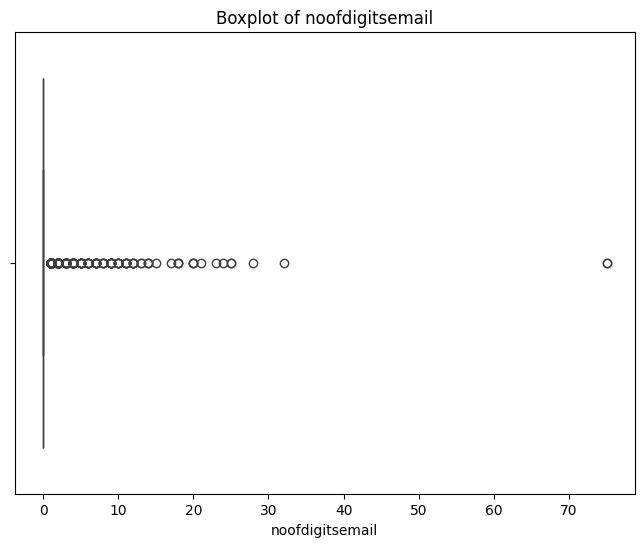

Total Number of outliers in column noofsubdomainsemail is 1

 Outliers for column noofsubdomainsemail are {-1} respectively.


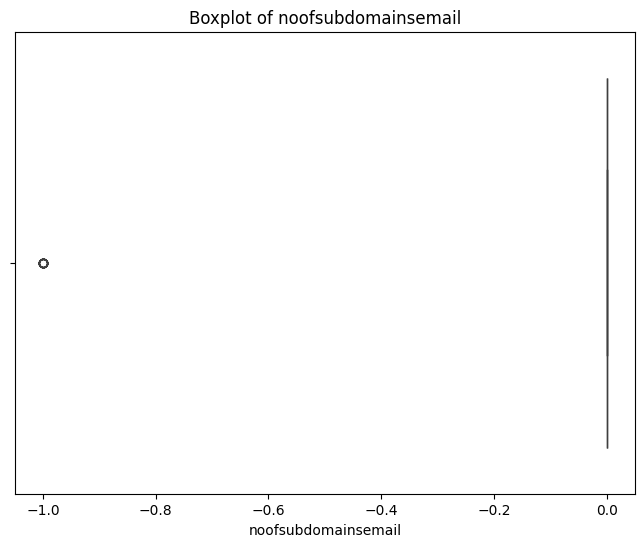

Total Number of outliers in column body_html is 1

 Outliers for column body_html are {1} respectively.


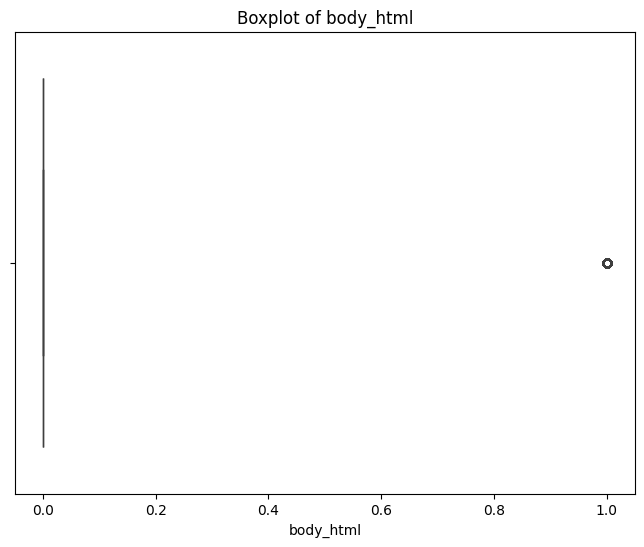

Total Number of outliers in column body_forms is 0

 Outliers for column body_forms are set() respectively.


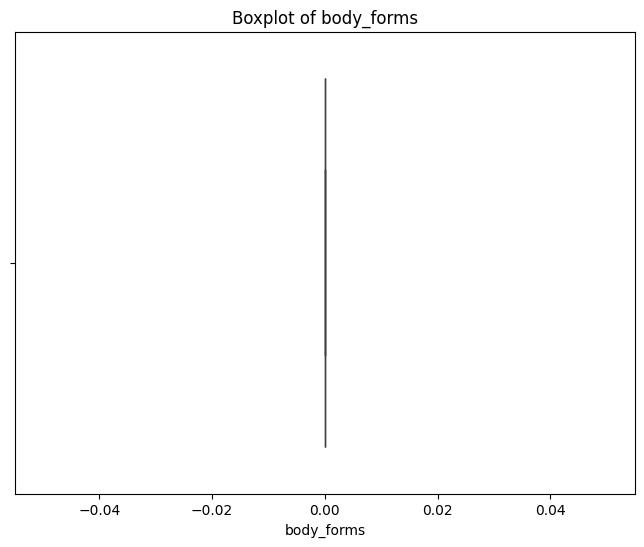

Total Number of outliers in column body_no Words is 263

 Outliers for column body_no Words are {512, 513, 514, 515, 516, 1027, 518, 1019, 1540, 9223, 522, 1020, 3596, 526, 1550, 1040, 529, 530, 531, 2039, 2064, 536, 537, 538, 1561, 540, 541, 542, 1566, 544, 1058, 1572, 549, 558, 559, 1072, 2606, 3571, 1075, 566, 1078, 568, 4152, 571, 574, 575, 1088, 2111, 578, 579, 2115, 585, 1609, 587, 588, 1099, 1102, 2121, 592, 593, 594, 596, 597, 598, 4695, 155224, 1115, 604, 1117, 606, 608, 610, 611, 1638, 616, 1133, 623, 626, 1139, 1140, 632, 633, 635, 640, 641, 1154, 1664, 645, 646, 647, 1157, 651, 1677, 654, 1168, 657, 658, 662, 664, 1177, 1182, 672, 1184, 1698, 678, 682, 2221, 688, 697, 4281, 701, 709, 710, 1734, 5829, 716, 1231, 7889, 722, 2770, 730, 732, 733, 739, 961, 741, 1252, 743, 746, 963, 752, 753, 1778, 1779, 4848, 6897, 758, 760, 2296, 2298, 1276, 766, 767, 1280, 1475, 1790, 183046, 776, 777, 3337, 781, 1297, 786, 789, 6424, 797, 1309, 799, 804, 1829, 808, 814, 815, 816, 817, 820, 3

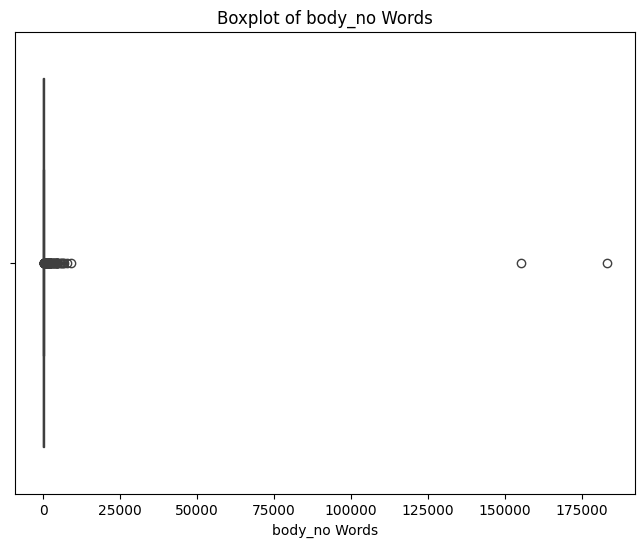

Total Number of outliers in column body_no Characters is 295

 Outliers for column body_no Characters are {7169, 4611, 6148, 3591, 3592, 4616, 5130, 6664, 47625, 24077, 3598, 12815, 3600, 1159693, 5651, 3606, 6679, 4633, 32793, 13341, 44062, 3103, 3104, 5155, 3111, 3623, 4649, 7209, 5675, 24619, 30334, 5167, 9263, 39988, 3126, 3640, 4665, 4154, 3645, 3646, 3648, 7232, 4675, 4169, 4681, 12361, 5198, 4175, 4176, 5201, 53839, 4180, 5717, 7252, 4183, 8790, 42072, 3162, 25692, 9821, 5727, 6240, 4195, 18534, 3181, 4205, 6256, 4212, 3702, 3194, 10362, 5245, 5246, 3199, 5759, 6784, 7294, 3715, 4228, 3205, 25726, 26244, 2696, 5770, 3213, 4750, 11918, 3729, 7318, 4250, 5275, 23196, 3229, 2725, 5797, 3241, 3242, 4781, 15023, 7344, 2737, 2743, 3257, 3770, 6841, 4284, 2750, 3263, 2752, 4798, 46786, 4294, 6856, 3274, 3790, 2767, 4302, 4303, 2770, 3283, 4814, 4816, 4819, 4821, 3288, 4823, 4825, 10969, 4316, 4829, 3296, 4832, 3298, 8928, 2788, 5351, 12007, 3306, 3307, 5357, 6381, 3311, 5359, 4337, 587

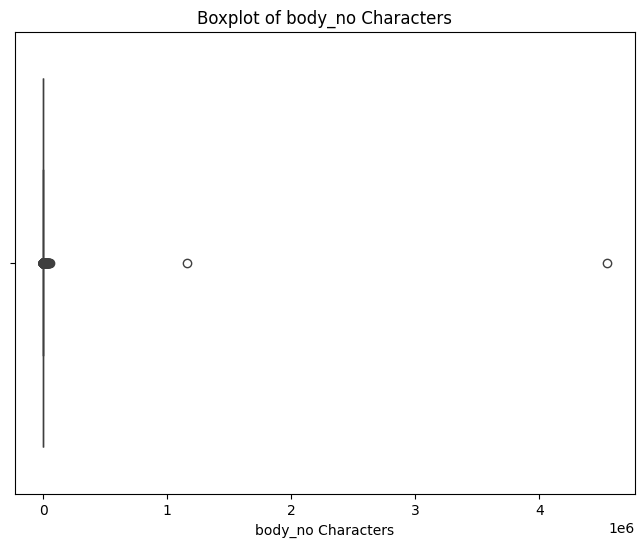

Total Number of outliers in column body_noDistinct Words is 198

 Outliers for column body_noDistinct Words are {524, 529, 1045, 535, 539, 546, 1570, 29732, 551, 562, 567, 577, 585, 597, 601, 613, 616, 624, 637, 652, 1676, 655, 657, 658, 675, 683, 688, 689, 704, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 735, 224, 225, 226, 227, 739, 229, 230, 231, 232, 233, 234, 235, 236, 239, 753, 242, 243, 244, 754, 246, 247, 248, 249, 250, 252, 253, 254, 256, 257, 258, 260, 261, 262, 263, 264, 265, 266, 267, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 785, 283, 284, 285, 286, 792, 288, 794, 290, 291, 296, 298, 299, 302, 304, 305, 307, 308, 309, 819, 823, 312, 313, 314, 315, 316, 317, 319, 320, 837, 330, 59722, 332, 333, 334, 337, 338, 342, 344, 346, 347, 859, 860, 350, 351, 352, 355, 356, 359, 360, 362, 363, 364, 365, 366, 367, 368, 374, 377, 379, 380, 381, 385, 387, 393, 394, 398, 400, 401, 402, 915, 916, 405, 413, 417, 422, 427, 940, 1456,

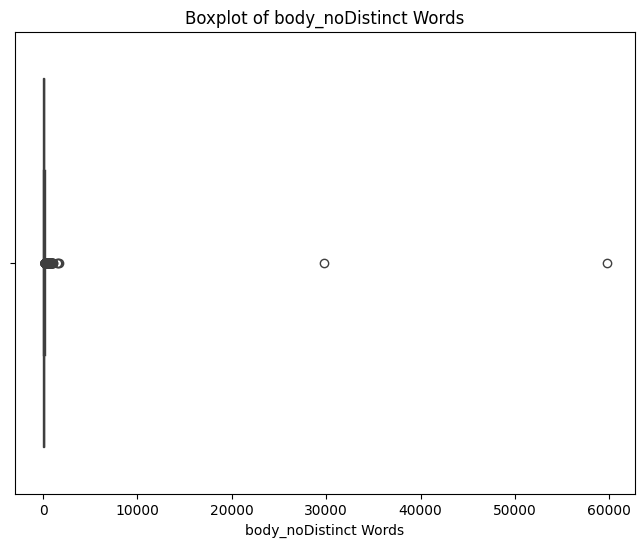

Total Number of outliers in column body_richness is 128

 Outliers for column body_richness are {0.0, 0.08777852802160702, 0.24060150375939848, 0.23088731961928155, 0.24691358024691357, 0.23628691983122363, 0.23873873873873874, 0.24990403071017275, 0.25, 0.25034514496088356, 1.0, 0.035066981875492516, 0.2713815789473684, 0.0782608695652174, 0.0801658604008293, 0.03827751196172249, 0.33163265306122447, 0.23517786561264822, 0.03408360128617363, 0.07217610970768676, 0.23243781094527363, 0.233201581027668, 0.23666232921275213, 0.262137049941928, 0.3411764705882353, 0.09210526315789473, 0.31753130590339895, 0.03235014272121789, 0.03504761904761905, 0.23546994354035206, 0.23559322033898306, 0.24408703878902555, 0.24713375796178344, 0.24979983987189752, 0.2504592774035517, 0.2525298568693591, 0.2530276816608997, 0.27941176470588236, 0.28177882723337266, 0.32439024390243903, 0.03416996444627791, 0.08333333333333333, 0.32795314955006427, 0.31219903691813805, 0.25505443234836706, 0.2342857142857

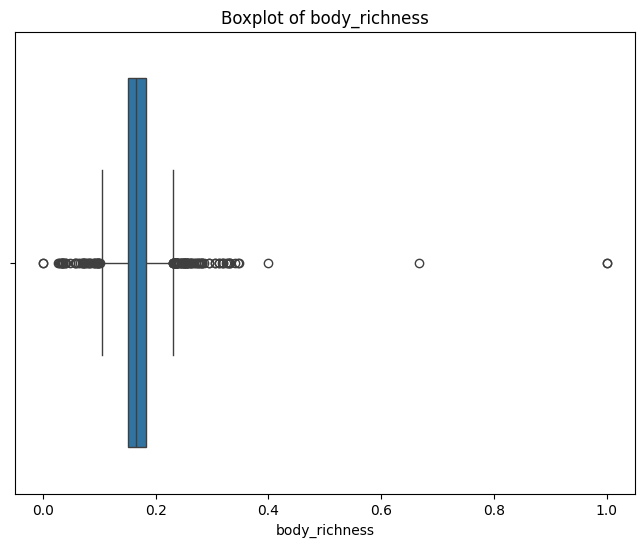

Total Number of outliers in column body_noFunction Words is 50

 Outliers for column body_noFunction Words are {18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 38, 40, 42, 44, 46, 47, 48, 49, 52, 53, 56, 320, 65, 66, 68, 71, 72, 73, 76, 78, 80, 81, 84, 85, 86, 2772, 89, 91, 146, 98, 126, 127} respectively.


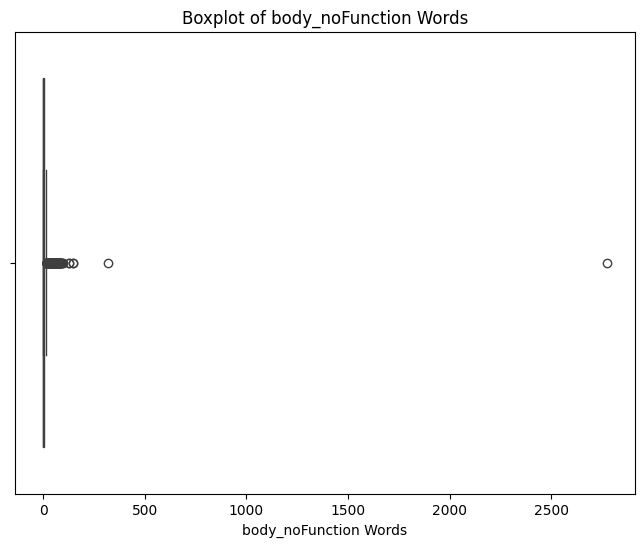

Total Number of outliers in column body_suspension is 1

 Outliers for column body_suspension are {1} respectively.


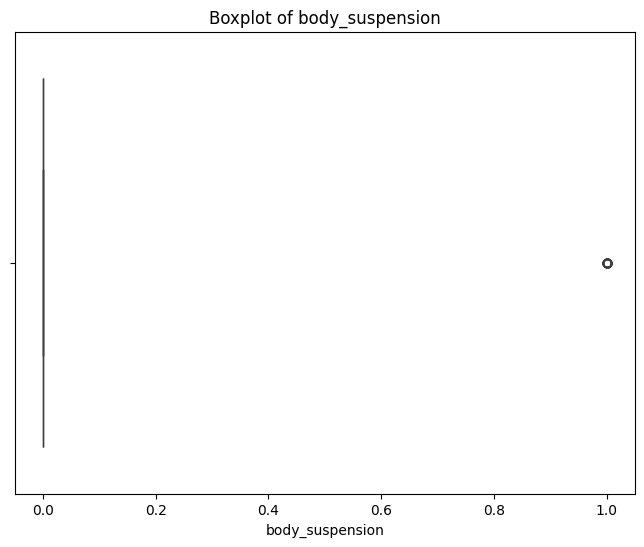

Total Number of outliers in column body_verify YourAccount is 0

 Outliers for column body_verify YourAccount are set() respectively.


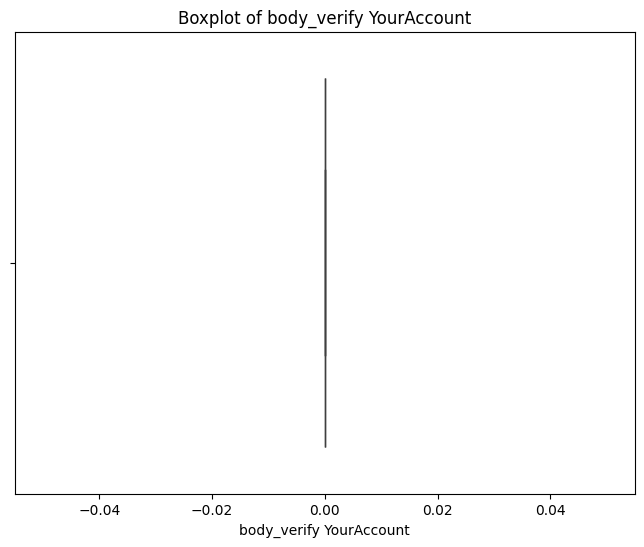

Total Number of outliers in column url_ipAddress is 0

 Outliers for column url_ipAddress are set() respectively.


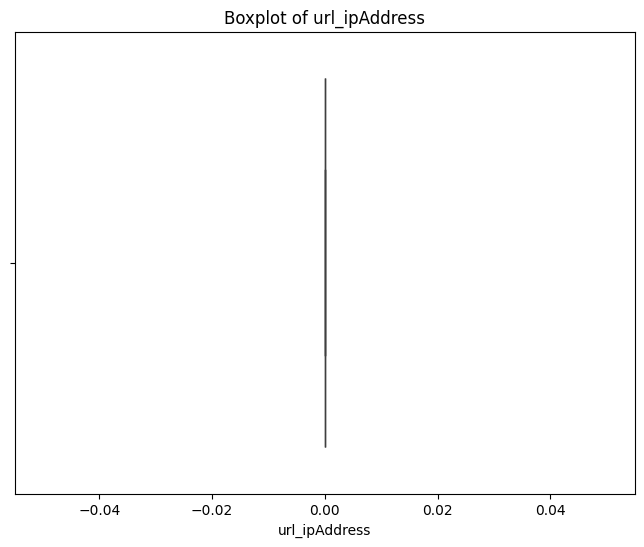

Total Number of outliers in column url_noIpAddresses is 0

 Outliers for column url_noIpAddresses are set() respectively.


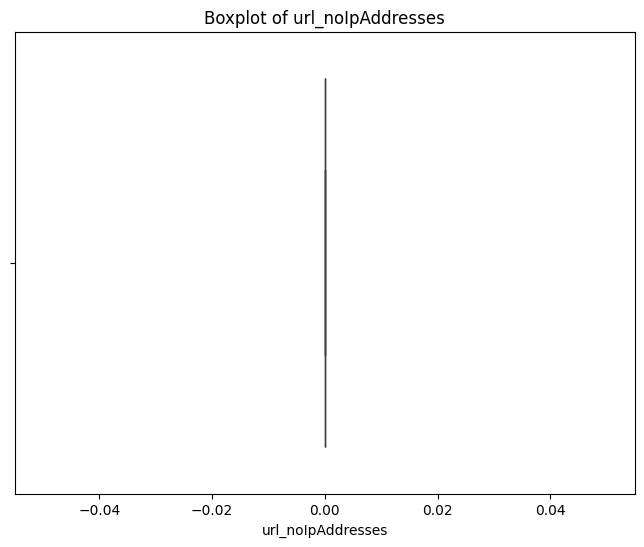

Total Number of outliers in column url_atSymbol is 0

 Outliers for column url_atSymbol are set() respectively.


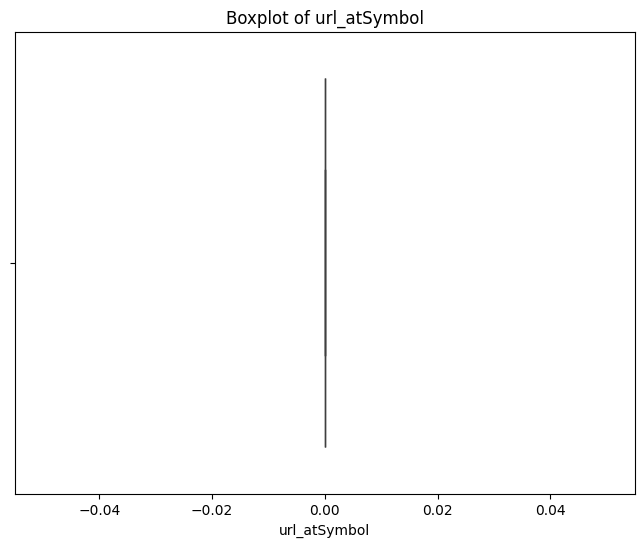

Total Number of outliers in column url_noLinks is 0

 Outliers for column url_noLinks are set() respectively.


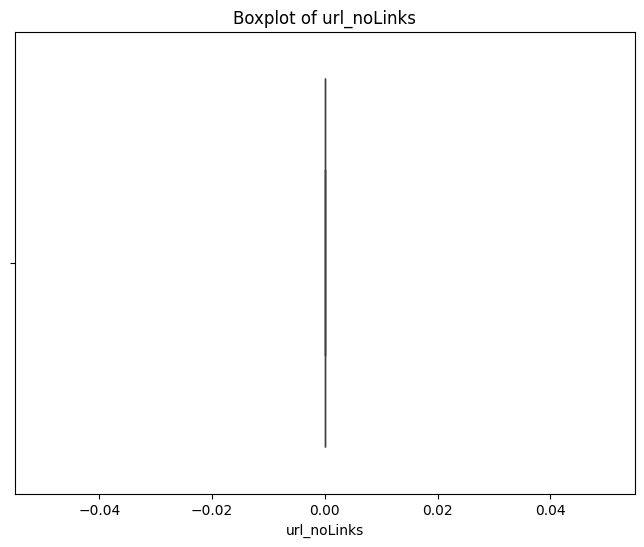

Total Number of outliers in column url_noIntLinks is 0

 Outliers for column url_noIntLinks are set() respectively.


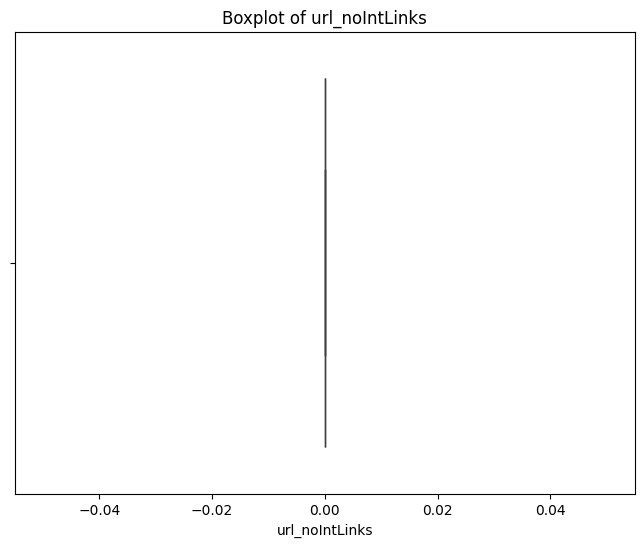

Total Number of outliers in column url_noExtLinks is 0

 Outliers for column url_noExtLinks are set() respectively.


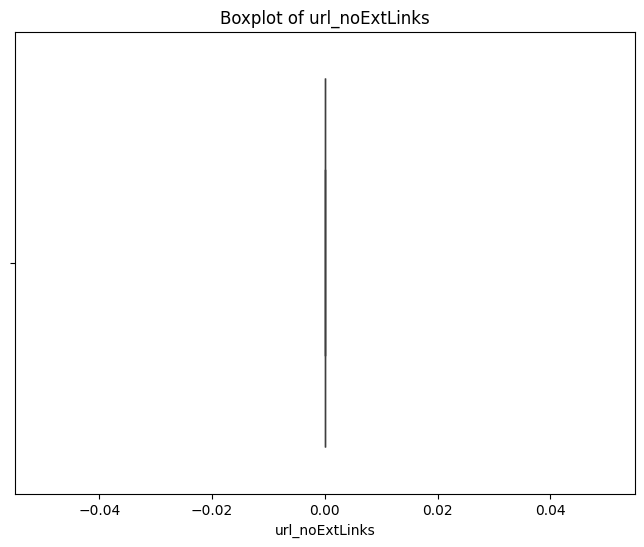

Total Number of outliers in column url_noImgLinks is 0

 Outliers for column url_noImgLinks are set() respectively.


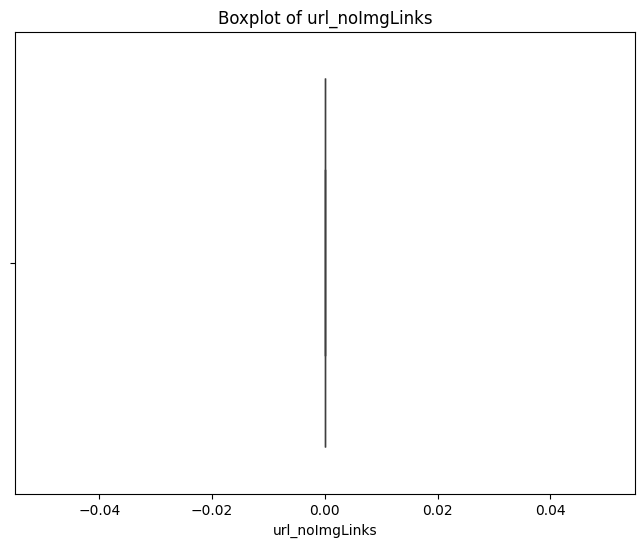

Total Number of outliers in column url_noDomains is 0

 Outliers for column url_noDomains are set() respectively.


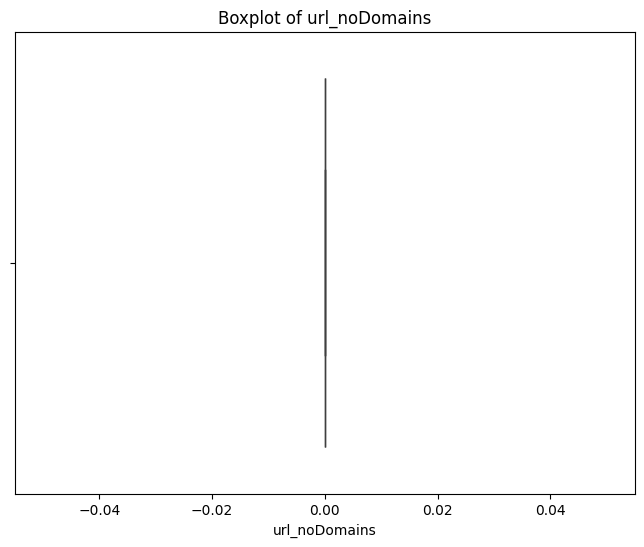

Total Number of outliers in column url_maxNoPeriods is 0

 Outliers for column url_maxNoPeriods are set() respectively.


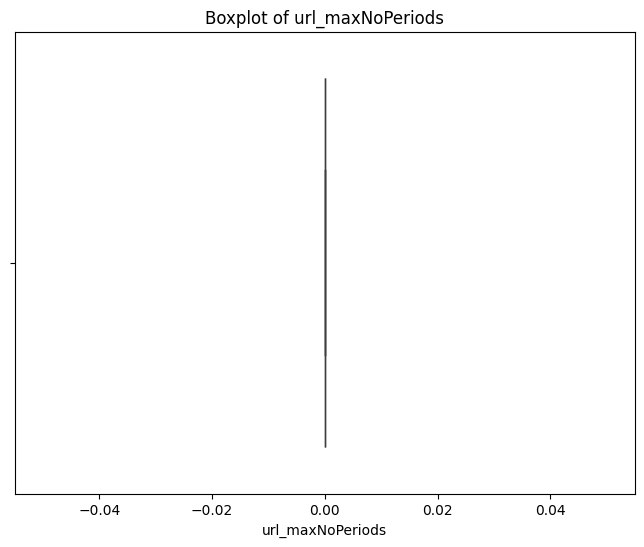

Total Number of outliers in column url_linkText is 0

 Outliers for column url_linkText are set() respectively.


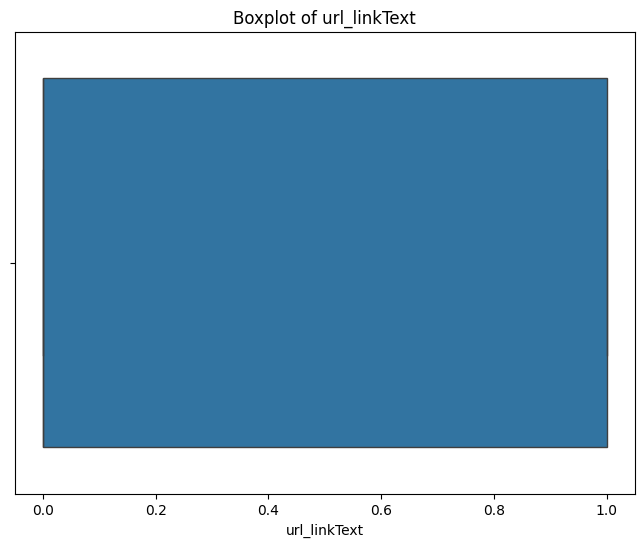

Total Number of outliers in column url_nonModalHereLinks is 0

 Outliers for column url_nonModalHereLinks are set() respectively.


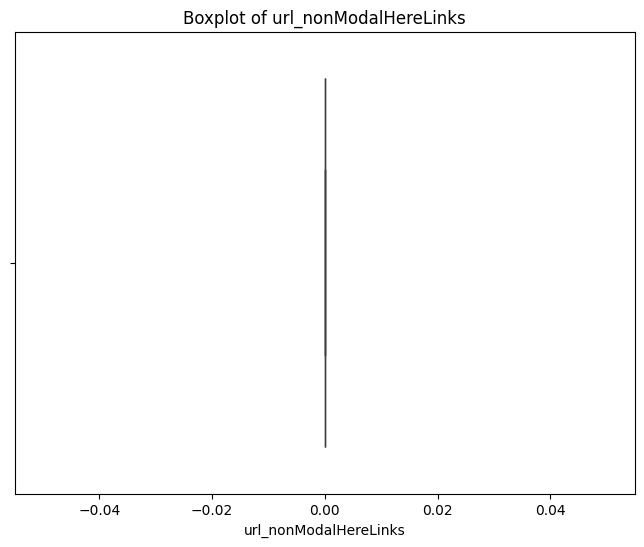

Total Number of outliers in column url_ports is 0

 Outliers for column url_ports are set() respectively.


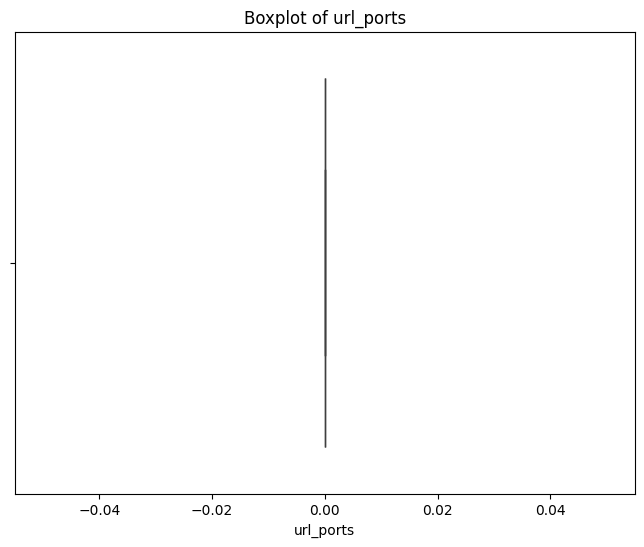

Total Number of outliers in column url_noPorts is 0

 Outliers for column url_noPorts are set() respectively.


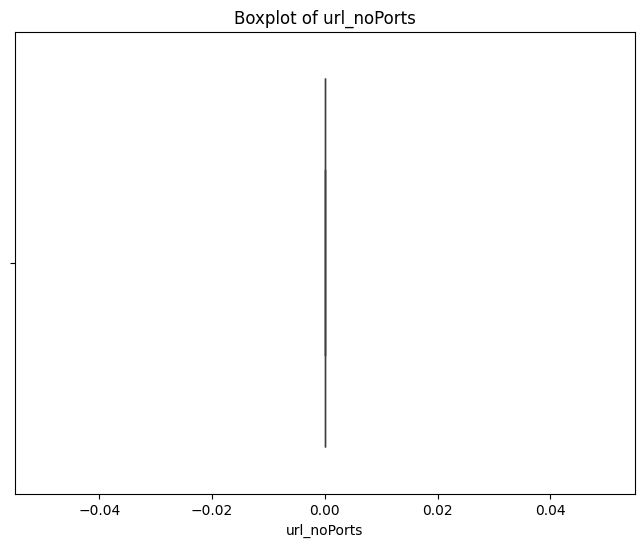

Total Number of outliers in column subj_reply is 0

 Outliers for column subj_reply are set() respectively.


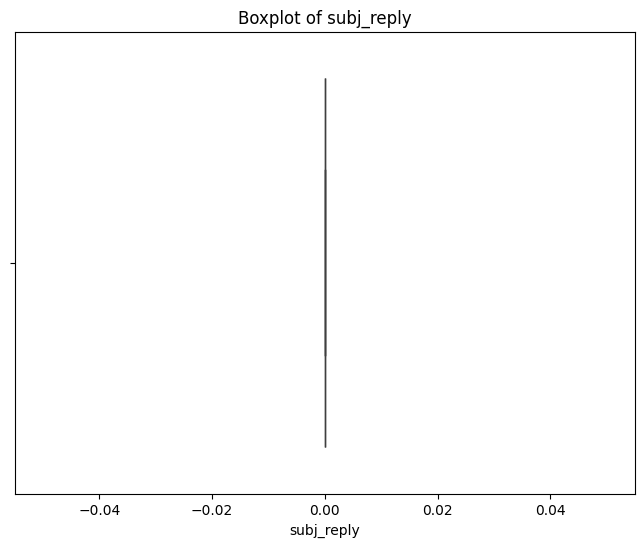

Total Number of outliers in column subj_forward is 0

 Outliers for column subj_forward are set() respectively.


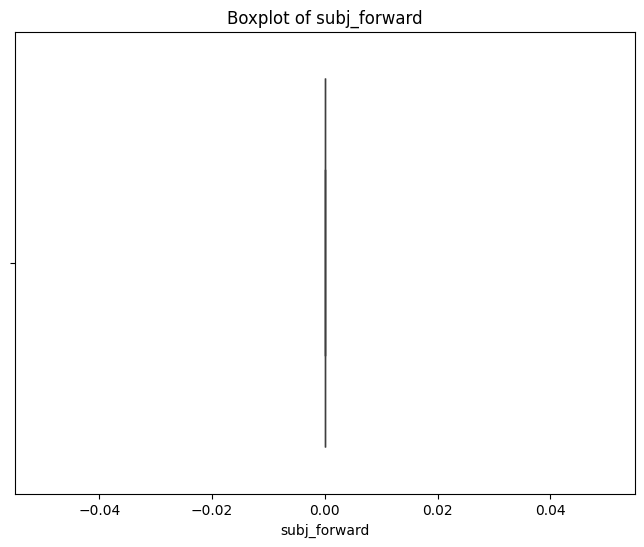

Total Number of outliers in column subj_noWords is 16

 Outliers for column subj_noWords are {32, 35, 36, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 90, 63} respectively.


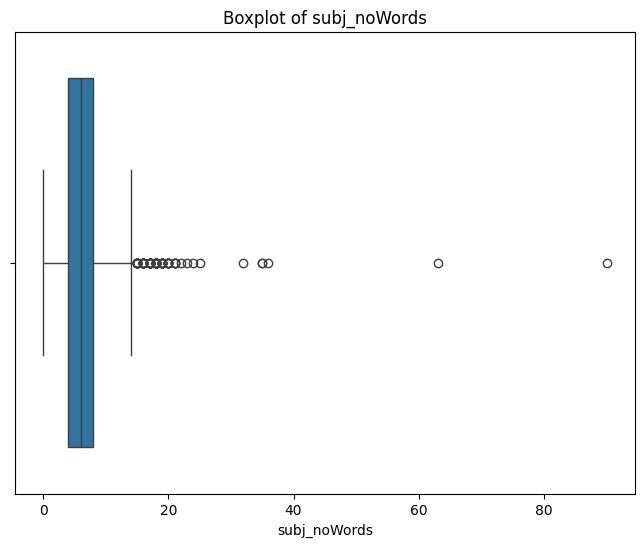

Total Number of outliers in column subj_noCharacters is 46

 Outliers for column subj_noCharacters are {129, 132, 260, 135, 136, 137, 141, 144, 150, 407, 163, 164, 172, 186, 442, 581, 210, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 98, 100, 101, 103, 104, 105, 107, 109, 111, 112, 113, 114, 116, 117, 120, 123, 126} respectively.


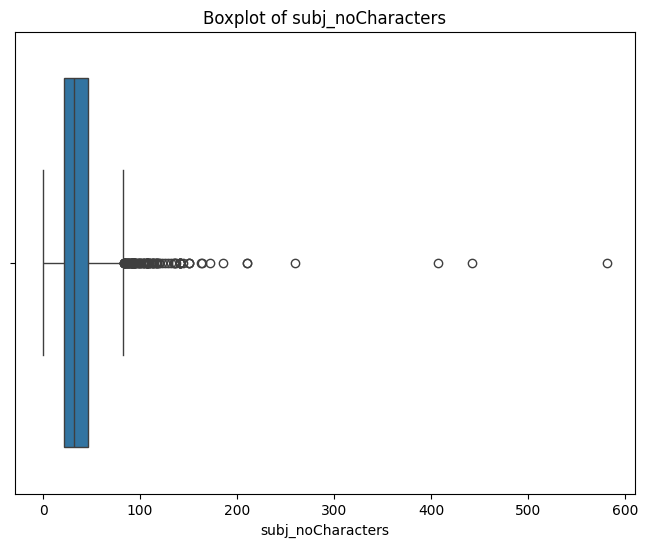

Total Number of outliers in column subj_richness is 9

 Outliers for column subj_richness are {0.0, 0.3157894736842105, 0.3333333333333333, 0.3181818181818182, 0.32608695652173914, 0.34782608695652173, 0.36363636363636365, 0.4, 0.5} respectively.


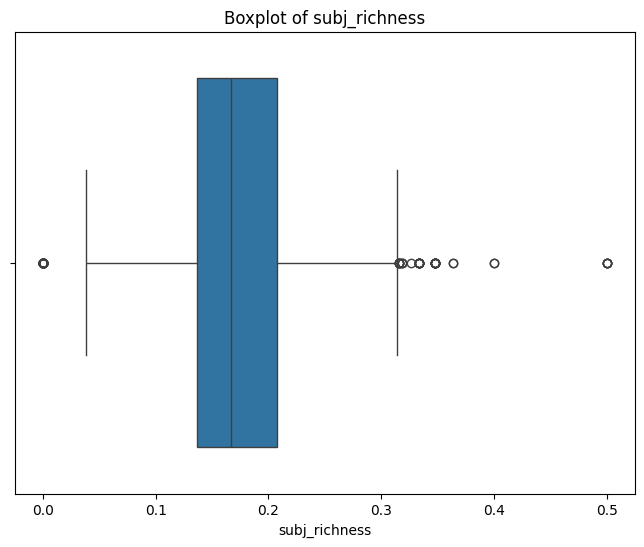

Total Number of outliers in column subj_verify is 1

 Outliers for column subj_verify are {1} respectively.


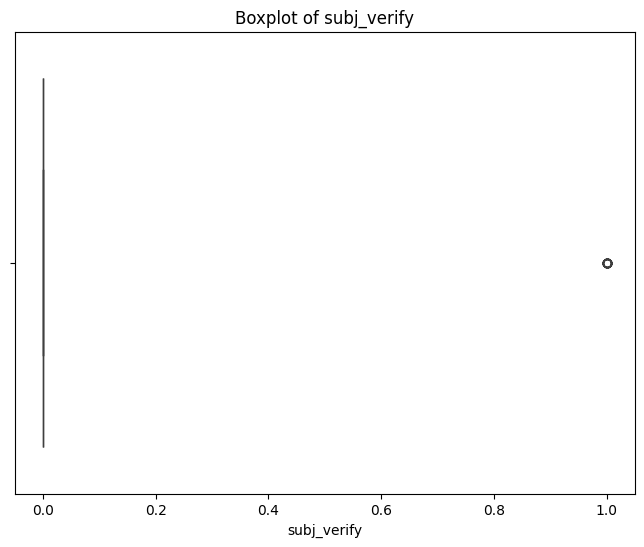

Total Number of outliers in column subj_debit is 1

 Outliers for column subj_debit are {1} respectively.


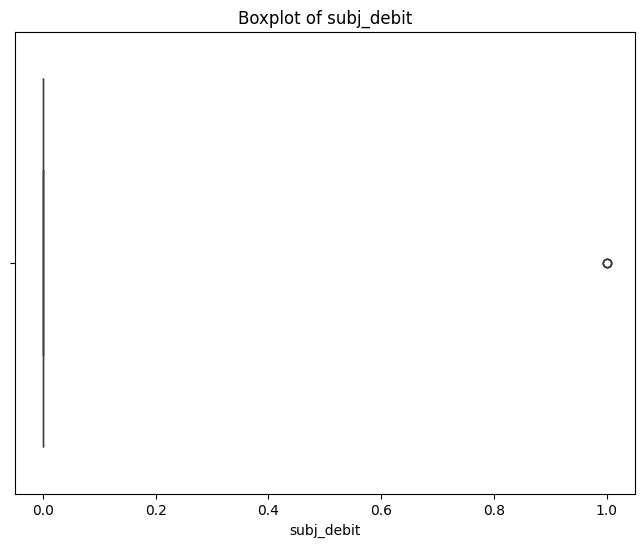

Total Number of outliers in column subj_bank is 1

 Outliers for column subj_bank are {1} respectively.


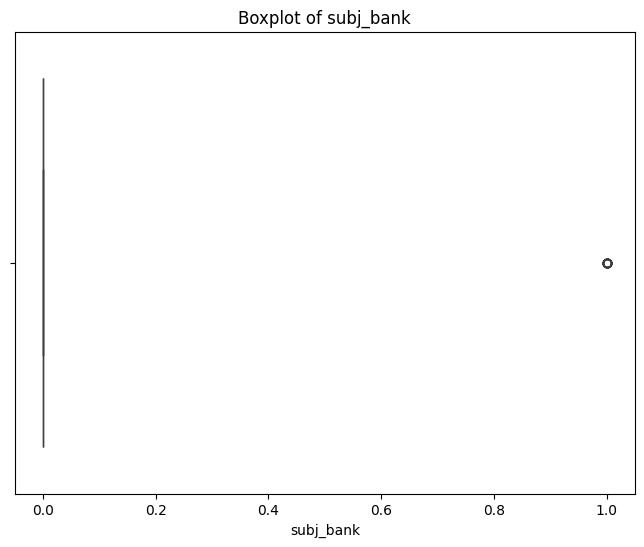

In [ ]:
#columns_names = ['lengthofEmailID', 'noofDotsEmailId', 'noofdashesemailid','noofspecialcharactersemailid','noofdigitsemail','noofsubdomainsemail']

for column in columns_names:
    df_to_list = [i for i in numerical_data[column]]
    lowerlimit, upperlimit, IQR , outliers = calculate_outlier(numerical_data[column])
    print(f"Total Number of outliers in column {column} is {len(outliers)}")
    print()
    print(f' Outliers for column {column} are {outliers} respectively.')

    plt.figure(figsize=(8, 6))
    sns.boxplot(numerical_data[column], orient='h')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

<Axes: >

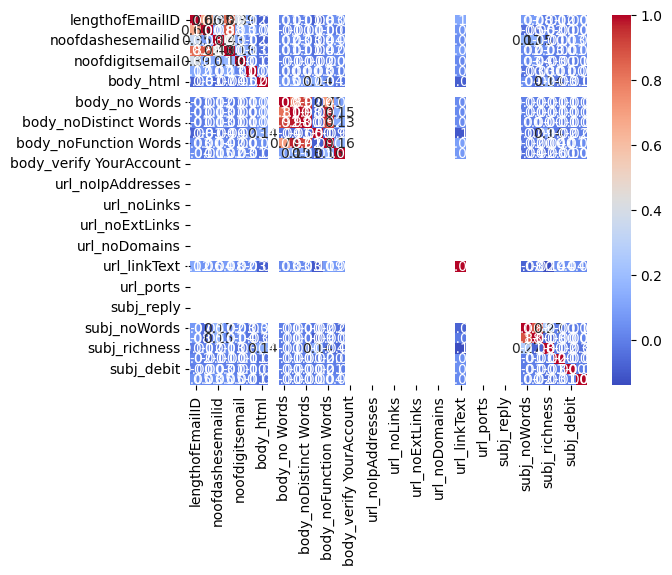

In [ ]:
# Lets plot heat map for reference
correlation_coefficients = numerical_data.corr()
sns.heatmap(correlation_coefficients, annot=True, cmap='coolwarm', fmt='.2f')

In [ ]:
numerical_data.describe()

,lengthofEmailID,noofDotsEmailId,noofdashesemailid,noofspecialcharactersemailid,noofdigitsemail,noofsubdomainsemail,body_html,body_forms,body_no Words,body_no Characters,...,url_ports,url_noPorts,subj_reply,subj_forward,subj_noWords,subj_noCharacters,subj_richness,subj_verify,subj_debit,subj_bank
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.0,3065.000000,3.065000e+03,...,3065.0,3065.0,3065.0,3065.0,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,20.716803,1.373246,0.140294,2.447308,0.472431,-0.004894,0.085808,0.0,340.449592,3.237486e+03,...,0.0,0.0,0.0,0.0,6.314845,37.061990,0.173828,0.009135,0.001305,0.009135
std,11.185508,0.925947,0.428152,1.359588,2.774483,0.069797,0.280125,0.0,4357.514370,8.470611e+04,...,0.0,0.0,0.0,0.0,4.247376,26.571165,0.058123,0.095157,0.036108,0.095157
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,55.000000,3.450000e+02,...,0.0,0.0,0.0,0.0,4.000000,22.000000,0.136364,0.000000,0.000000,0.000000
50%,21.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,110.000000,6.710000e+02,...,0.0,0.0,0.0,0.0,6.000000,32.000000,0.166667,0.000000,0.000000,0.000000
75%,26.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,212.000000,1.279000e+03,...,0.0,0.0,0.0,0.0,8.000000,46.000000,0.207547,0.000000,0.000000,0.000000
max,104.000000,11.000000,6.000000,17.000000,75.000000,0.000000,1.000000,0.0,183046.000000,4.542703e+06,...,0.0,0.0,0.0,0.0,90.000000,581.000000,0.500000,1.000000,1.000000,1.000000


### **Observations**

1. Target variable is less correlated with all other features.


## Showing pairplot between label and other fileds, We can observe that there is low correlation.

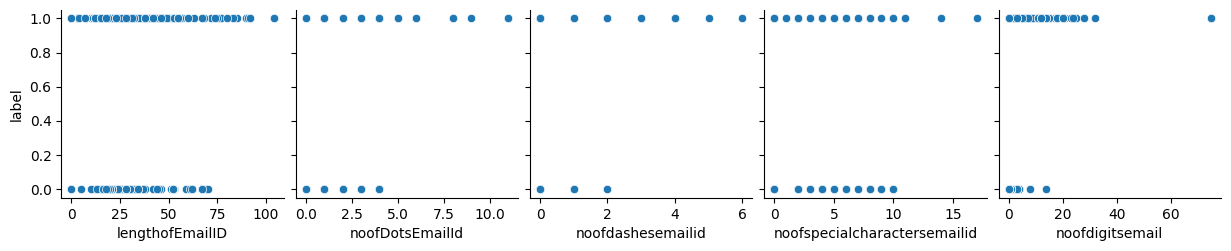

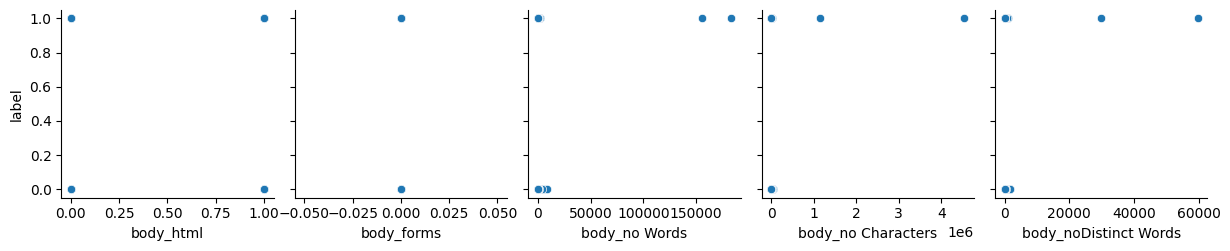

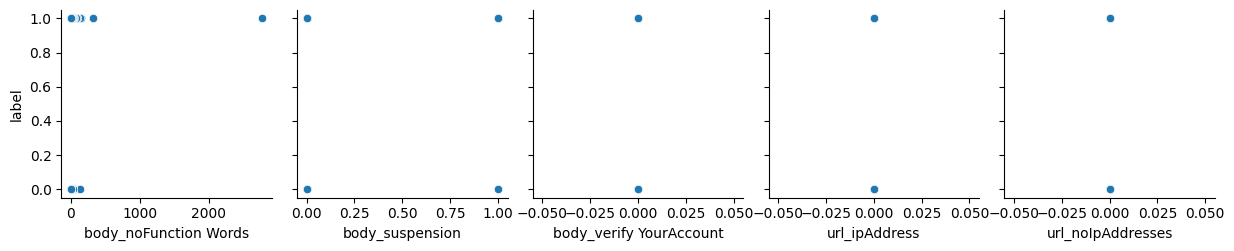

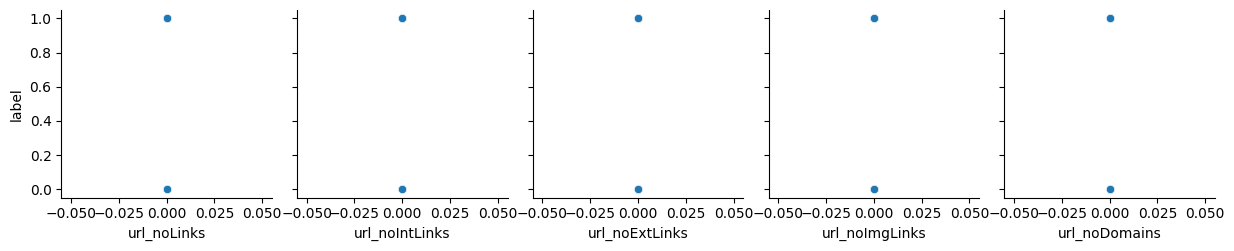

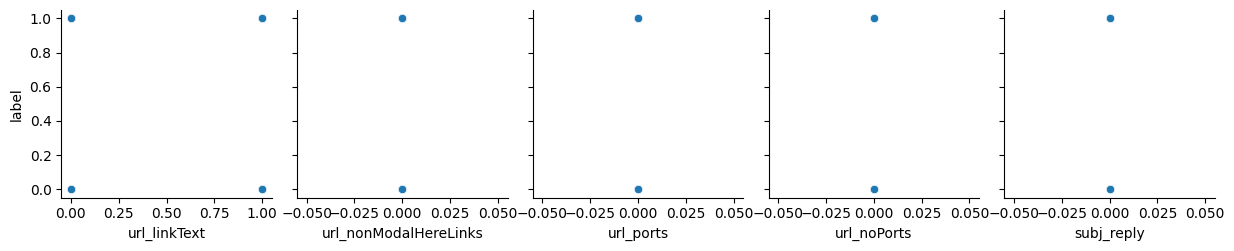

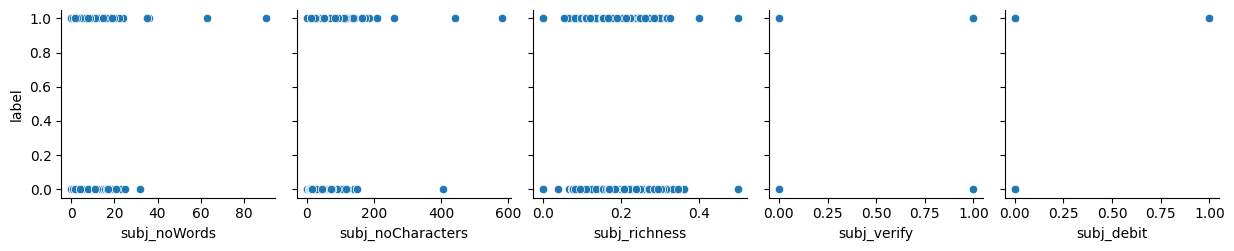

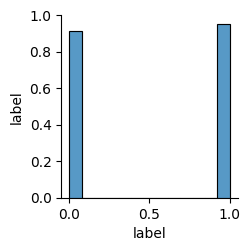

In [ ]:
numerical_data['label'] = data_nazario['label']
for i in range(0, len(numerical_data.columns), 6):
    sns.pairplot(data=numerical_data,
                x_vars=numerical_data.columns[i:i+5],
                y_vars=['label'])

### **Analyze Feature to feature relationship**

<Axes: >

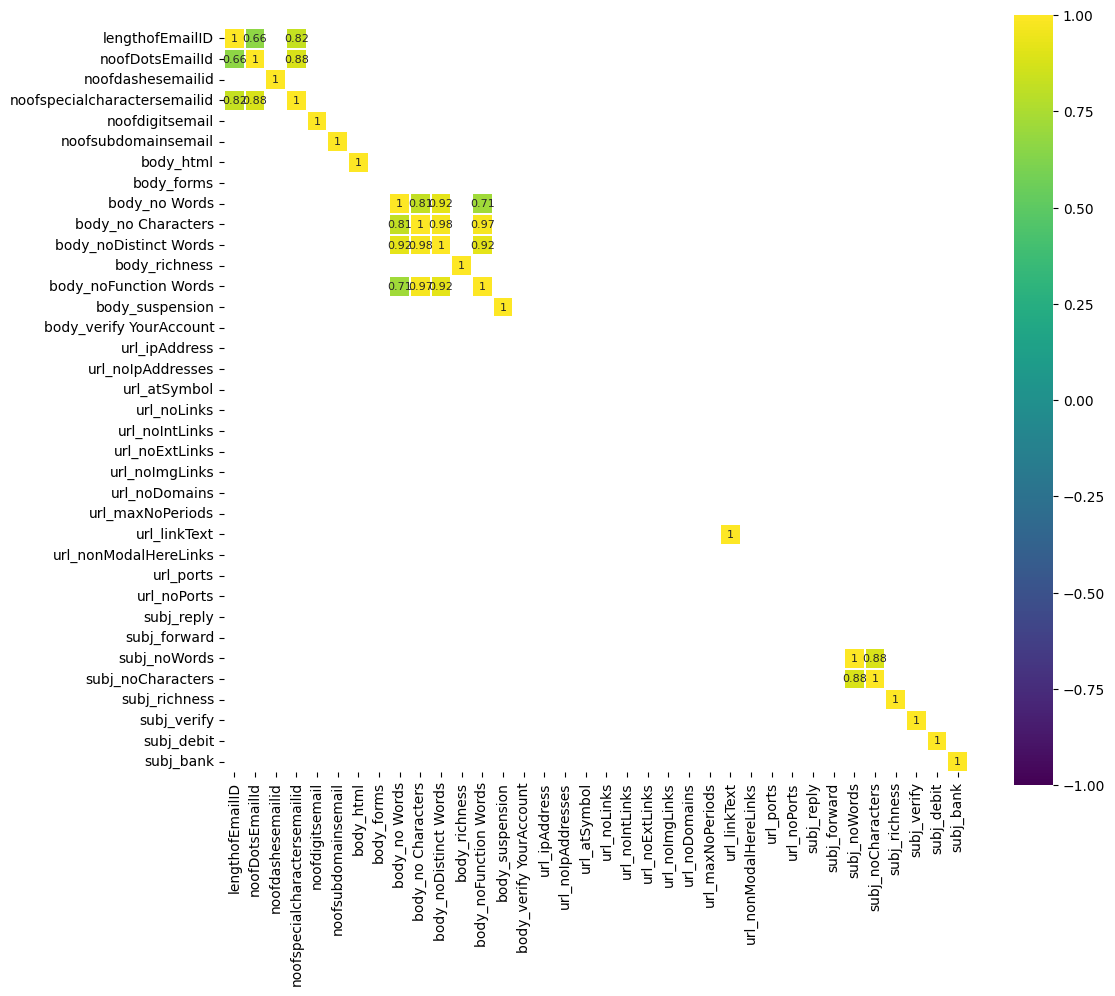

In [ ]:
corr = numerical_data.drop('label', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [ ]:
import pandas as pd
import numpy as np

# Function to calculate entropy
def calculate_entropy(labels):
    class_counts = labels.value_counts()
    probabilities = class_counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Function to calculate information gain
def calculate_information_gain(data, feature, target):
    # Calculate entropy of the target variable
    target_entropy = calculate_entropy(data[target])

    # Calculate entropy of the feature
    feature_entropy = 0
    unique_values = data[feature].unique()
    for value in unique_values:
        subset = data[data[feature] == value]
        subset_entropy = calculate_entropy(subset[target])
        feature_entropy += (len(subset) / len(data)) * subset_entropy

    # Calculate information gain
    information_gain = target_entropy - feature_entropy
    return information_gain

# Function to calculate classification error
def calculate_classification_error(data, feature, target):
    # Count occurrences of each class for each value of the feature
    class_counts = data.groupby([feature, target]).size().unstack(fill_value=0)

    # Calculate classification error
    classification_error = 1 - class_counts.max(axis=1) / class_counts.sum(axis=1)
    weighted_error = (class_counts.sum(axis=1) / len(data)) * classification_error
    total_error = weighted_error.sum()
    return total_error

# Function to calculate Gini Index
def calculate_gini_index(data, feature, target):
    # Count occurrences of each class for each value of the feature
    class_counts = data.groupby([feature, target]).size().unstack(fill_value=0)

    # Calculate Gini Index
    proportions = class_counts.div(class_counts.sum(axis=1), axis=0)
    gini = 1 - (proportions ** 2).sum(axis=1)
    weighted_gini = (class_counts.sum(axis=1) / len(data)) * gini
    total_gini = weighted_gini.sum()
    return total_gini



# Define target variable
target_variable = 'label'

# Initialize lists to store results
results = []

# Iterate over each feature column
for column in numerical_data.columns:
    if column != target_variable:
        # Calculate Information Gain
        ig = calculate_information_gain(numerical_data, column, target_variable)

        # Calculate Entropy
        entropy = calculate_entropy(numerical_data[target_variable])

        # Calculate Classification Error
        classification_error = calculate_classification_error(numerical_data, column, target_variable)

        # Calculate Gini Index
        gini_index = calculate_gini_index(numerical_data, column, target_variable)

        # Append results to the list
        results.append({'Column Name': column, 'Information Gain': ig,
                        'Classification Error': classification_error, 'Gini Index': gini_index})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by Information Gain in descending order
results_df = results_df.sort_values(by='Information Gain', ascending=False)

# Display the DataFrame
print(results_df)


                     Column Name  Information Gain  Classification Error  \
11                 body_richness          0.898058              0.044372   
9             body_no Characters          0.563021              0.174551   
32                 subj_richness          0.287925              0.248287   
8                  body_no Words          0.265059              0.278630   
10         body_noDistinct Words          0.261730              0.271452   
12         body_noFunction Words          0.223587              0.265905   
0                lengthofEmailID          0.090227              0.373573   
1                noofDotsEmailId          0.075519              0.358891   
6                      body_html          0.070305              0.411419   
24                  url_linkText          0.070120              0.348777   
30                  subj_noWords          0.069604              0.383687   
31             subj_noCharacters          0.069374              0.391843   
3   noofspec

In [ ]:
results_df

,Column Name,Information Gain,Classification Error,Gini Index
11,body_richness,0.898058,0.044372,0.049810
9,body_no Characters,0.563021,0.174551,0.211090
32,subj_richness,0.287925,0.248287,0.333047
8,body_no Words,0.265059,0.278630,0.352199
10,body_noDistinct Words,0.261730,0.271452,0.351658
12,body_noFunction Words,0.223587,0.265905,0.362048
0,lengthofEmailID,0.090227,0.373573,0.444494
1,noofDotsEmailId,0.075519,0.358891,0.449901
6,body_html,0.070305,0.411419,0.459189
24,url_linkText,0.070120,0.348777,0.452124


In [ ]:
import pandas as pd

# Assuming you have a sorted DataFrame 'results_df' with columns ['Column Name', 'Information Gain']
# Make sure it's sorted in descending order of Information Gain

# Select the column with the highest Information Gain (Best)
best_column = results_df.iloc[0]['Column Name']

# Select the column with the median Information Gain
median_index = len(results_df) // 2
median_column = results_df.iloc[median_index]['Column Name']

# Select the column with the lowest Information Gain (Worst)
worst_column = results_df.iloc[-1]['Column Name']

# Display the results
print("Best:", best_column)
print("Median:", median_column)
print("Worst:", worst_column)


Best: body_richness
Median: noofsubdomainsemail
Worst: url_noLinks


In [ ]:
# Assuming you have a DataFrame 'results_df' with columns ['Column Name', 'Information Gain']

# Filter the DataFrame to remove columns with IG equal to 0
filtered_results_df = results_df[results_df['Information Gain'] != 0]

# Display the filtered Date
column_names = filtered_results_df['Column Name'].tolist()

numerical_data = numerical_data[column_names]


In [ ]:
numerical_data['label'] = data_nazario['label']

In [ ]:
numerical_data

,body_richness,body_no Characters,subj_richness,body_no Words,body_noDistinct Words,body_noFunction Words,lengthofEmailID,noofDotsEmailId,body_html,url_linkText,...,subj_noCharacters,noofspecialcharactersemailid,noofdigitsemail,noofdashesemailid,body_suspension,subj_verify,subj_bank,noofsubdomainsemail,subj_debit,label
0,0.143632,13646,0.244444,1960,735,9,19,2,1,0,...,45,3,0,0,0,0,0,0,0,0
1,0.206997,343,0.210526,71,46,3,18,2,0,0,...,19,3,0,0,0,0,0,0,0,0
2,0.152672,524,0.222222,80,52,1,20,2,0,0,...,18,3,0,0,0,0,0,0,0,0
3,0.237772,1472,0.162162,350,121,5,21,2,1,0,...,37,3,0,0,0,0,0,0,0,0
4,0.155660,212,0.157895,33,29,0,26,3,0,0,...,19,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,0.164779,1766,0.190476,291,95,10,28,1,0,1,...,21,2,0,0,0,0,0,0,0,1
3061,0.135135,148,0.111111,20,16,0,19,1,0,0,...,27,2,0,0,0,0,0,0,0,1
3062,0.143524,857,0.153846,123,34,9,92,11,0,1,...,52,17,12,3,0,0,0,0,0,1
3063,0.162722,338,0.120000,55,45,3,18,1,0,0,...,25,2,0,0,0,0,0,0,0,1


In [ ]:
numerical_data.to_csv('numerical_data.csv')